In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
in_time = pd.read_csv('/kaggle/input/hr-analytics-case-study/in_time.csv')
manager_survey_data = pd.read_csv('/kaggle/input/hr-analytics-case-study/manager_survey_data.csv')
employee_survey_data = pd.read_csv('/kaggle/input/hr-analytics-case-study/employee_survey_data.csv')
data_dictionary= pd.read_excel('/kaggle/input/hr-analytics-case-study/data_dictionary.xlsx')
out_time = pd.read_csv('/kaggle/input/hr-analytics-case-study/out_time.csv')
general_data = pd.read_csv('/kaggle/input/hr-analytics-case-study/general_data.csv')

In [3]:
in_time=in_time.replace(np.nan,0)
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
in_time.head()

/tmp/ipykernel_34/2912657673.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')


Unnamed: 0 2015-01-01          2015-01-02          2015-01-05  \
0           1 1970-01-01 2015-01-02 09:43:45 2015-01-05 10:08:48   
1           2 1970-01-01 2015-01-02 10:15:44 2015-01-05 10:21:05   
2           3 1970-01-01 2015-01-02 10:17:41 2015-01-05 09:50:50   
3           4 1970-01-01 2015-01-02 10:05:06 2015-01-05 09:56:32   
4           5 1970-01-01 2015-01-02 10:28:17 2015-01-05 09:49:58   

           2015-01-06          2015-01-07          2015-01-08  \
0 2015-01-06 09:54:26 2015-01-07 09:34:31 2015-01-08 09:51:09   
1 1970-01-01 00:00:00 2015-01-07 09:45:17 2015-01-08 10:09:04   
2 2015-01-06 10:14:13 2015-01-07 09:47:27 2015-01-08 10:03:40   
3 2015-01-06 10:11:07 2015-01-07 09:37:30 2015-01-08 10:02:08   
4 2015-01-06 09:45:28 2015-01-07 09:49:37 2015-01-08 10:19:44   

           2015-01-09          2015-01-12          2015-01-13 2015-01-14  \
0 2015-01-09 10:09:25 2015-01-12 09:42:53 2015-01-13 10:13:06 1970-01-01   
1 2015-01-09 09:43:26 2015-01-12 10:00:07 2015-01-13 10:43:29 1970-01-01   
2 2015-01-09 10:05:49 2015-01-12 10:03:47 2015-01-13 10:21:26 1970-01-01   
3 2015-01-09 10:08:12 2015-01-12 10:13:42 2015-01-13 09:53:22 1970-01-01   
4 2015-01-09 10:00:50 2015-01-12 10:29:27 2015-01-13 09:59:32 1970-01-01   

           2015-01-15          2015-01-16          2015-01-19  \
0 2015-01-15 10:01:24 2015-01-16 10:19:08 1970-01-01 00:00:00   
1 2015-01-15 09:37:57 2015-01-16 09:57:18 2015-01-19 10:23:43   
2 2015-01-15 09:55:11 2015-01-16 10:05:36 2015-01-19 09:47:53   
3 2015-01-15 10:00:50 2015-01-16 09:58:06 2015-01-19 09:43:11   
4 2015-01-15 10:06:12 2015-01-16 10:03:50 1970-01-01 00:00:00   

           2015-01-20          2015-01-21          2015-01-22  \
0 2015-01-20 09:50:34 2015-01-21 09:49:42 2015-01-22 09:47:45   
1 2015-01-20 09:29:03 2015-01-21 09:46:45 2015-01-22 10:03:51   
2 2015-01-20 09:57:09 2015-01-21 10:29:40 2015-01-22 09:59:11   
3 2015-01-20 10:29:06 2015-01-21 10:04:33 2015-01-22 09:51:07   
4 2015-01-20 10:10:29 2015-01-21 10:28:15 2015-01-22 10:10:10   

           2015-01-23 2015-01-26          2015-01-27          2015-01-28  \
0 2015-01-23 09:23:44 1970-01-01 2015-01-27 09:50:37 2015-01-28 09:56:13   
1 2015-01-23 09:20:06 1970-01-01 2015-01-27 10:07:48 2015-01-28 10:08:25   
2 2015-01-23 10:16:34 1970-01-01 2015-01-27 10:07:30 2015-01-28 10:05:43   
3 2015-01-23 09:56:56 1970-01-01 2015-01-27 09:48:31 2015-01-28 10:00:39   
4 2015-01-23 09:34:34 1970-01-01 2015-01-27 09:56:59 2015-01-28 09:45:03   

           2015-01-29          2015-01-30          2015-02-02  \
0 2015-01-29 09:53:47 2015-01-30 10:09:26 2015-02-02 09:38:43   
1 2015-01-29 09:52:04 2015-01-30 09:49:49 2015-02-02 10:07:26   
2 2015-01-29 10:06:48 2015-01-30 10:14:36 2015-02-02 09:54:45   
3 2015-01-29 09:49:28 2015-01-30 09:56:31 2015-02-02 10:14:08   
4 2015-01-29 10:11:41 2015-01-30 10:24:50 2015-02-02 09:43:27   

           2015-02-03          2015-02-04          2015-02-05  \
0 2015-02-03 10:23:38 2015-02-04 09:48:37 2015-02-05 09:52:36   
1 2015-02-03 09:55:45 2015-02-04 10:25:41 2015-02-05 10:05:11   
2 2015-02-03 09:27:11 2015-02-04 10:04:03 2015-02-05 10:08:11   
3 2015-02-03 10:01:31 2015-02-04 10:31:44 2015-02-05 10:02:39   
4 2015-02-03 09:55:59 2015-02-04 10:03:25 2015-02-05 10:02:17   

           2015-02-06          2015-02-09          2015-02-10  \
0 2015-02-06 09:53:23 2015-02-09 10:01:45 2015-02-10 10:14:18   
1 2015-02-06 09:12:39 1970-01-01 00:00:00 2015-02-10 10:10:13   
2 2015-02-06 10:23:51 2015-02-09 10:08:43 2015-02-10 10:26:18   
3 2015-02-06 09:24:21 2015-02-09 09:56:27 1970-01-01 00:00:00   
4 2015-02-06 09:55:43 2015-02-09 10:15:16 2015-02-10 09:43:48   

           2015-02-11          2015-02-12          2015-02-13  \
0 2015-02-11 10:18:44 2015-02-12 10:10:35 2015-02-13 09:13:07   
1 2015-02-11 09:40:20 2015-02-12 10:10:09 2015-02-13 09:35:25   
2 2015-02-11 10:02:13 2015-02-12 09:55:10 2015-02-13 10:32:34   
3 2015-02-11 10:00:32 2015-02-12 10:01:48 2015-02-13 10:14:10   
4 2015-02

In [4]:
out_time=out_time.replace(np.nan,0)
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
out_time.head()

/tmp/ipykernel_34/2435588168.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')


Unnamed: 0 2015-01-01          2015-01-02          2015-01-05  \
0           1 1970-01-01 2015-01-02 16:56:15 2015-01-05 17:20:11   
1           2 1970-01-01 2015-01-02 18:22:17 2015-01-05 17:48:22   
2           3 1970-01-01 2015-01-02 16:59:14 2015-01-05 17:06:46   
3           4 1970-01-01 2015-01-02 17:25:24 2015-01-05 17:14:03   
4           5 1970-01-01 2015-01-02 18:31:37 2015-01-05 17:49:15   

           2015-01-06          2015-01-07          2015-01-08  \
0 2015-01-06 17:19:05 2015-01-07 16:34:55 2015-01-08 17:08:32   
1 1970-01-01 00:00:00 2015-01-07 17:09:06 2015-01-08 17:34:04   
2 2015-01-06 16:38:32 2015-01-07 16:33:21 2015-01-08 17:24:22   
3 2015-01-06 17:07:42 2015-01-07 16:32:40 2015-01-08 16:53:11   
4 2015-01-06 17:26:25 2015-01-07 17:37:59 2015-01-08 17:59:28   

           2015-01-09          2015-01-12          2015-01-13 2015-01-14  \
0 2015-01-09 17:38:29 2015-01-12 16:58:39 2015-01-13 18:02:58 1970-01-01   
1 2015-01-09 16:52:29 2015-01-12 17:36:48 2015-01-13 18:00:13 1970-01-01   
2 2015-01-09 16:57:30 2015-01-12 17:28:54 2015-01-13 17:21:25 1970-01-01   
3 2015-01-09 17:19:47 2015-01-12 17:13:37 2015-01-13 17:11:45 1970-01-01   
4 2015-01-09 17:44:08 2015-01-12 18:51:21 2015-01-13 18:14:58 1970-01-01   

           2015-01-15          2015-01-16          2015-01-19  \
0 2015-01-15 17:22:13 2015-01-16 17:35:11 1970-01-01 00:00:00   
1 2015-01-15 17:14:44 2015-01-16 17:40:57 2015-01-19 17:58:22   
2 2015-01-15 17:21:29 2015-01-16 17:18:13 2015-01-19 16:52:13   
3 2015-01-15 16:53:26 2015-01-16 16:52:34 2015-01-19 16:14:18   
4 2015-01-15 18:21:48 2015-01-16 18:28:03 1970-01-01 00:00:00   

           2015-01-20          2015-01-21          2015-01-22  \
0 2015-01-20 16:37:07 2015-01-21 16:55:24 2015-01-22 16:50:47   
1 2015-01-20 17:05:13 2015-01-21 17:41:05 2015-01-22 17:26:26   
2 2015-01-20 16:52:23 2015-01-21 17:17:50 2015-01-22 17:27:54   
3 2015-01-20 17:39:50 2015-01-21 16:46:51 2015-01-22 16:51:48   
4 2015-01-20 17:59:24 2015-01-21 18:41:38 2015-01-22 18:27:37   

           2015-01-23 2015-01-26          2015-01-27          2015-01-28  \
0 2015-01-23 17:00:01 1970-01-01 2015-01-27 17:28:22 2015-01-28 17:03:21   
1 2015-01-23 17:06:50 1970-01-01 2015-01-27 17:35:50 2015-01-28 17:19:48   
2 2015-01-23 17:11:52 1970-01-01 2015-01-27 17:22:27 2015-01-28 16:24:04   
3 2015-01-23 17:05:41 1970-01-01 2015-01-27 17:03:48 2015-01-28 17:33:22   
4 2015-01-23 16:53:11 1970-01-01 2015-01-27 17:52:43 2015-01-28 17:40:46   

           2015-01-29          2015-01-30          2015-02-02  \
0 2015-01-29 17:18:36 2015-01-30 17:00:25 2015-02-02 16:32:49   
1 2015-01-29 17:07:38 2015-01-30 16:53:22 2015-02-02 17:45:18   
2 2015-01-29 17:20:07 2015-01-30 17:16:03 2015-02-02 16:59:01   
3 2015-01-29 16:44:01 2015-01-30 17:09:42 2015-02-02 17:18:12   
4 2015-01-29 18:16:26 2015-01-30 18:26:33 2015-02-02 17:53:21   

           2015-02-03          2015-02-04          2015-02-05  \
0 2015-02-03 17:35:49 2015-02-04 17:24:56 2015-02-05 17:26:31   
1 2015-02-03 17:33:42 2015-02-04 18:04:20 2015-02-05 17:43:25   
2 2015-02-03 15:58:24 2015-02-04 17:25:54 2015-02-05 16:29:41   
3 2015-02-03 17:27:41 2015-02-04 17:30:22 2015-02-05 17:11:44   
4 2015-02-03 17:57:43 2015-02-04 18:03:13 2015-02-05 18:07:43   

           2015-02-06          2015-02-09          2015-02-10  \
0 2015-02-06 17:21:35 2015-02-09 17:37:50 2015-02-10 17:30:20   
1 2015-02-06 17:06:42 1970-01-01 00:00:00 2015-02-10 18:12:17   
2 2015-02-06 17:18:15 2015-02-09 16:48:18 2015-02-10 17:15:49   
3 2015-02-06 16:33:04 2015-02-09 17:16:29 1970-01-01 00:00:00   
4 2015-02-06 17:38:14 2015-02-09 18:26:28 2015-02-10 17:24:32   

           2015-02-11          2015-02-12          2015-02-13  \
0 2015-02-11 17:30:19 2015-02-12 17:36:42 2015-02-13 16:25:26   
1 2015-02-11 17:18:36 2015-02-12 18:08:01 2015-02-13 17:19:25   
2 2015-02-11 16:49:22 2015-02-12 16:22:31 2015-02-13 17:41:15   
3 2015-02-11 17:04:11 2015-02-12 17:22:16 2015-02-13 17:22:54   
4 2015-02

In [5]:
in_time=in_time.append(out_time)

/tmp/ipykernel_34/2771603544.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  in_time=in_time.append(out_time)


In [6]:
in_time=in_time.diff(periods=4410)
in_time=in_time.iloc[4410:]
in_time.reset_index(inplace=True)
in_time.head()

/tmp/ipykernel_34/974290197.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  in_time.reset_index(inplace=True)


index  Unnamed: 0 2015-01-01      2015-01-02      2015-01-05  \
0      0         0.0     0 days 0 days 07:12:30 0 days 07:11:23   
1      1         0.0     0 days 0 days 08:06:33 0 days 07:27:17   
2      2         0.0     0 days 0 days 06:41:33 0 days 07:15:56   
3      3         0.0     0 days 0 days 07:20:18 0 days 07:17:31   
4      4         0.0     0 days 0 days 08:03:20 0 days 07:59:17   

       2015-01-06      2015-01-07      2015-01-08      2015-01-09  \
0 0 days 07:24:39 0 days 07:00:24 0 days 07:17:23 0 days 07:29:04   
1 0 days 00:00:00 0 days 07:23:49 0 days 07:25:00 0 days 07:09:03   
2 0 days 06:24:19 0 days 06:45:54 0 days 07:20:42 0 days 06:51:41   
3 0 days 06:56:35 0 days 06:55:10 0 days 06:51:03 0 days 07:11:35   
4 0 days 07:40:57 0 days 07:48:22 0 days 07:39:44 0 days 07:43:18   

       2015-01-12      2015-01-13 2015-01-14      2015-01-15      2015-01-16  \
0 0 days 07:15:46 0 days 07:49:52     0 days 0 days 07:20:49 0 days 07:16:03   
1 0 days 07:36:41 0 days 07:16:44     0 days 0 days 07:36:47 0 days 07:43:39   
2 0 days 07:25:07 0 days 06:59:59     0 days 0 days 07:26:18 0 days 07:12:37   
3 0 days 06:59:55 0 days 07:18:23     0 days 0 days 06:52:36 0 days 06:54:28   
4 0 days 08:21:54 0 days 08:15:26     0 days 0 days 08:15:36 0 days 08:24:13   

       2015-01-19      2015-01-20      2015-01-21      2015-01-22  \
0 0 days 00:00:00 0 days 06:46:33 0 days 07:05:42 0 days 07:03:02   
1 0 days 07:34:39 0 days 07:36:10 0 days 07:54:20 0 days 07:22:35   
2 0 days 07:04:20 0 days 06:55:14 0 days 06:48:10 0 days 07:28:43   
3 0 days 06:31:07 0 days 07:10:44 0 days 06:42:18 0 days 07:00:41   
4 0 days 00:00:00 0 days 07:48:55 0 days 08:13:23 0 days 08:17:27   

       2015-01-23 2015-01-26      2015-01-27      2015-01-28      2015-01-29  \
0 0 days 07:36:17     0 days 0 days 07:37:45 0 days 07:07:08 0 days 07:24:49   
1 0 days 07:46:44     0 days 0 days 07:28:02 0 days 07:11:23 0 days 07:15:34   
2 0 days 06:55:18     0 days 0 days 07:14:57 0 days 06:18:21 0 days 07:13:19   
3 0 days 07:08:45     0 days 0 days 07:15:17 0 days 07:32:43 0 days 06:54:33   
4 0 days 07:18:37     0 days 0 days 07:55:44 0 days 07:55:43 0 days 08:04:45   

       2015-01-30      2015-02-02      2015-02-03      2015-02-04  \
0 0 days 06:50:59 0 days 06:54:06 0 days 07:12:11 0 days 07:36:19   
1 0 days 07:03:33 0 days 07:37:52 0 days 07:37:57 0 days 07:38:39   
2 0 days 07:01:27 0 days 07:04:16 0 days 06:31:13 0 days 07:21:51   
3 0 days 07:13:11 0 days 07:04:04 0 days 07:26:10 0 days 06:58:38   
4 0 days 08:01:43 0 days 08:09:54 0 days 08:01:44 0 days 07:59:48   

       2015-02-05      2015-02-06      2015-02-09      2015-02-10  \
0 0 days 07:33:55 0 days 07:28:12 0 days 07:36:05 0 days 07:16:02   
1 0 days 07:38:14 0 days 07:54:03 0 days 00:00:00 0 days 08:02:04   
2 0 days 06:21:30 0 days 06:54:24 0 days 06:39:35 0 days 06:49:31   
3 0 days 07:09:05 0 days 07:08:43 0 days 07:20:02 0 days 00:00:00   
4 0 days 08:05:26 0 days 07:42:31 0 days 08:11:12 0 days 07:40:44   

       2015-02-11      2015-02-12      2015-02-13      2015-02-16  \
0 0 days 07:11:35 0 days 07:26:07 0 days 07:12:19 0 days 07:36:21   
1 0 days 07:38:16 0 days 07:57:52 0 days 07:44:00 0 days 07:41:57   
2 0 days 06:47:09 0 days 06:27:21 0 days 07:08:41 0 days 07:01:22   
3 0 days 07:03:39 0 days 07:20:28 0 days 07:08:44 0 days 07:21:01   
4 0 days 07:57:49 0 days 07:40:15 0 days 08:43:14 0 days 07:55:20   

       2015-02-17      2015-02-18      2015-02-19      2015-02-20  \
0 0 days 07:24:58 0 days 07:50:23 0 days 00:00:00 0 days 07:49:56   
1 0 days 07:24:25 0 days 07:54:14 0 days 07:54:46 0 days 07:25:27   
2 0 days 06:41:07 0 days 07:02:49 0 days 06:57:37 0 days 06:53:11   
3 0 days 07:06:38 0 days 06:52:21 0 days 07:31:25 0 days 06:41:52   
4 0 days 07:54:09 0 days 08:05:39 0 days 07:50:46 0 days 08:13:51   

       2015-02-23      2015-02-24      2015-02-25      2015-02-26  \
0 0 days 07:26:28 0 days 07:13:30 0 days 07:35:01 0 days 07:12:03   
1 0 days 0

In [7]:
in_time.drop(columns=['index','Unnamed: 0'],axis=1,inplace=True)
in_time.head()

2015-01-01      2015-01-02      2015-01-05      2015-01-06      2015-01-07  \
0     0 days 0 days 07:12:30 0 days 07:11:23 0 days 07:24:39 0 days 07:00:24   
1     0 days 0 days 08:06:33 0 days 07:27:17 0 days 00:00:00 0 days 07:23:49   
2     0 days 0 days 06:41:33 0 days 07:15:56 0 days 06:24:19 0 days 06:45:54   
3     0 days 0 days 07:20:18 0 days 07:17:31 0 days 06:56:35 0 days 06:55:10   
4     0 days 0 days 08:03:20 0 days 07:59:17 0 days 07:40:57 0 days 07:48:22   

       2015-01-08      2015-01-09      2015-01-12      2015-01-13 2015-01-14  \
0 0 days 07:17:23 0 days 07:29:04 0 days 07:15:46 0 days 07:49:52     0 days   
1 0 days 07:25:00 0 days 07:09:03 0 days 07:36:41 0 days 07:16:44     0 days   
2 0 days 07:20:42 0 days 06:51:41 0 days 07:25:07 0 days 06:59:59     0 days   
3 0 days 06:51:03 0 days 07:11:35 0 days 06:59:55 0 days 07:18:23     0 days   
4 0 days 07:39:44 0 days 07:43:18 0 days 08:21:54 0 days 08:15:26     0 days   

       2015-01-15      2015-01-16      2015-01-19      2015-01-20  \
0 0 days 07:20:49 0 days 07:16:03 0 days 00:00:00 0 days 06:46:33   
1 0 days 07:36:47 0 days 07:43:39 0 days 07:34:39 0 days 07:36:10   
2 0 days 07:26:18 0 days 07:12:37 0 days 07:04:20 0 days 06:55:14   
3 0 days 06:52:36 0 days 06:54:28 0 days 06:31:07 0 days 07:10:44   
4 0 days 08:15:36 0 days 08:24:13 0 days 00:00:00 0 days 07:48:55   

       2015-01-21      2015-01-22      2015-01-23 2015-01-26      2015-01-27  \
0 0 days 07:05:42 0 days 07:03:02 0 days 07:36:17     0 days 0 days 07:37:45   
1 0 days 07:54:20 0 days 07:22:35 0 days 07:46:44     0 days 0 days 07:28:02   
2 0 days 06:48:10 0 days 07:28:43 0 days 06:55:18     0 days 0 days 07:14:57   
3 0 days 06:42:18 0 days 07:00:41 0 days 07:08:45     0 days 0 days 07:15:17   
4 0 days 08:13:23 0 days 08:17:27 0 days 07:18:37     0 days 0 days 07:55:44   

       2015-01-28      2015-01-29      2015-01-30      2015-02-02  \
0 0 days 07:07:08 0 days 07:24:49 0 days 06:50:59 0 days 06:54:06   
1 0 days 07:11:23 0 days 07:15:34 0 days 07:03:33 0 days 07:37:52   
2 0 days 06:18:21 0 days 07:13:19 0 days 07:01:27 0 days 07:04:16   
3 0 days 07:32:43 0 days 06:54:33 0 days 07:13:11 0 days 07:04:04   
4 0 days 07:55:43 0 days 08:04:45 0 days 08:01:43 0 days 08:09:54   

       2015-02-03      2015-02-04      2015-02-05      2015-02-06  \
0 0 days 07:12:11 0 days 07:36:19 0 days 07:33:55 0 days 07:28:12   
1 0 days 07:37:57 0 days 07:38:39 0 days 07:38:14 0 days 07:54:03   
2 0 days 06:31:13 0 days 07:21:51 0 days 06:21:30 0 days 06:54:24   
3 0 days 07:26:10 0 days 06:58:38 0 days 07:09:05 0 days 07:08:43   
4 0 days 08:01:44 0 days 07:59:48 0 days 08:05:26 0 days 07:42:31   

       2015-02-09      2015-02-10      2015-02-11      2015-02-12  \
0 0 days 07:36:05 0 days 07:16:02 0 days 07:11:35 0 days 07:26:07   
1 0 days 00:00:00 0 days 08:02:04 0 days 07:38:16 0 days 07:57:52   
2 0 days 06:39:35 0 days 06:49:31 0 days 06:47:09 0 days 06:27:21   
3 0 days 07:20:02 0 days 00:00:00 0 days 07:03:39 0 days 07:20:28   
4 0 days 08:11:12 0 days 07:40:44 0 days 07:57:49 0 days 07:40:15   

       2015-02-13      2015-02-16      2015-02-17      2015-02-18  \
0 0 days 07:12:19 0 days 07:36:21 0 days 07:24:58 0 days 07:50:23   
1 0 days 07:44:00 0 days 07:41:57 0 days 07:24:25 0 days 07:54:14   
2 0 days 07:08:41 0 days 07:01:22 0 days 06:41:07 0 days 07:02:49   
3 0 days 07:08:44 0 days 07:21:01 0 days 07:06:38 0 days 06:52:21   
4 0 days 08:43:14 0 days 07:55:20 0 days 07:54:09 0 days 08:05:39   

       2015-02-19      2015-02-20      2015-02-23      2015-02-24  \
0 0 days 00:00:00 0 days 07:49:56 0 days 07:26:28 0 days 07:13:30   
1 0 days 07:54:46 0 days 07:25:27 0 days 08:15:20 0 days 07:48:00   
2 0 days 06:57:37 0 days 06:53:11 0 days 07:45:17 0 days 06:45:06   
3 0 days 07:31:25 0 days 06:41:52 0 days 07:10:47 0 days 07:03:51   
4 0 days 07:50:46 0 days 08:13:51 0 days 07:48:10 0 days 08:07:08   

       2015-02-25      2015-02-26      2015-02-27      2015-03-02  \


In [8]:
in_time.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05',
             '2015-05-01','2015-07-17','2015-09-17','2015-10-02',
              '2015-11-09','2015-11-10','2015-11-11','2015-12-25'
             ], axis = 1,inplace=True) 

In [9]:
in_time['Actual Time']=in_time.mean(axis=1)
in_time['Actual Time'].head()

0   0 days 06:52:12.823293172
1   0 days 07:18:57.493975903
2   0 days 06:48:57.891566265
3   0 days 06:47:21.172690763
4   0 days 07:52:39.220883534
Name: Actual Time, dtype: timedelta64[ns]

In [10]:
in_time['hrs']=in_time['Actual Time']/np.timedelta64(1, 'h')
in_time.reset_index(inplace=True)
in_time.drop(in_time.columns.difference(['index','hrs']), 1, inplace=True)
in_time.rename(columns={'index': 'EmployeeID'},inplace=True)
in_time.head()

/tmp/ipykernel_34/1332034323.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  in_time.drop(in_time.columns.difference(['index','hrs']), 1, inplace=True)


EmployeeID       hrs
0           0  6.870229
1           1  7.315971
2           2  6.816081
3           3  6.789215
4           4  7.877561

In [11]:
df_1 = pd.merge(employee_survey_data, general_data, how='inner', on='EmployeeID')
hr = pd.merge(manager_survey_data, df_1, how='inner', on='EmployeeID')
hr = pd.merge(in_time, hr, how='inner', on='EmployeeID')
hr.head()

EmployeeID        hrs  JobInvolvement  PerformanceRating  \
0           1   7.315971               3                  3   
1           2   6.816081               2                  4   
2           3   6.789215               3                  3   
3           4   7.877561               2                  3   
4           5  10.275802               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age Attrition  \
0                      3.0              4.0              2.0   51        No   
1                      3.0              2.0              4.0   31       Yes   
2                      2.0              2.0              1.0   32        No   
3                      4.0              4.0              3.0   38        No   
4                      4.0              1.0              3.0   32        No   

      BusinessTravel              Department  DistanceFromHome  Education  \
0      Travel_Rarely                   Sales                 6          2   
1  Travel_Frequently  Research & Development                10          1   
2  Travel_Frequently  Research & Development                17          4   
3         Non-Travel  Research & Development                 2          5   
4      Travel_Rarely  Research & Development                10          1   

  EducationField  EmployeeCount  Gender  JobLevel                    JobRole  \
0  Life Sciences              1  Female         1  Healthcare Representative   
1  Life Sciences              1  Female         1         Research Scientist   
2          Other              1    Male         4            Sales Executive   
3  Life Sciences              1    Male         3            Human Resources   
4        Medical              1    Male         1            Sales Executive   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0       Married         131160                 1.0      Y                 11   
1        Single          41890                 0.0      Y                 23   
2       Married         193280                 1.0      Y                 15   
3       Married          83210                 3.0      Y                 11   
4        Single          23420                 4.0      Y                 12   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0              8                 0                1.0                      6   
1              8                 1                6.0                      3   
2              8                 3                5.0                      2   
3              8                 3               13.0                      5   
4              8                 2                9.0                      2   

   YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
0               1                        0                     0  
1               5                        1                     4  
2               5                        0                     3  
3               8                        7                     5  
4               6                        0                     4

In [12]:
hr['JobLevel']=hr['JobLevel'].astype('object')

In [13]:
hr['Education'] = hr['Education'].replace({ 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'})
hr['EnvironmentSatisfaction'] = hr['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
hr['JobInvolvement'] = hr['JobInvolvement'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
hr['JobSatisfaction'] = hr['JobSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
#hr['RelationshipSatisfaction'] = hr['RelationshipSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',
#                   3: 'High',4: 'Very High'})
hr['PerformanceRating'] = hr['PerformanceRating'].replace({ 1 : 'Low', 2: 'Good',3: 'Excellent',4: 'Outstanding'})
hr['WorkLifeBalance'] = hr['WorkLifeBalance'].replace({ 1 : 'Bad', 2: 'Good',3: 'Better',4: 'Best'})

In [14]:
hr['EmployeeCount'].value_counts(ascending=False)

1    4409
Name: EmployeeCount, dtype: int64

In [15]:
hr['Over18'].value_counts(ascending=False)

Y    4409
Name: Over18, dtype: int64

In [16]:
hr['StandardHours'].value_counts(ascending=False)

8    4409
Name: StandardHours, dtype: int64

In [17]:
hr.drop(['EmployeeID', 'EmployeeCount','StandardHours','Over18'], axis = 1,inplace=True) 

In [18]:
hr.head()

hrs JobInvolvement PerformanceRating EnvironmentSatisfaction  \
0   7.315971           High         Excellent                    High   
1   6.816081         Medium       Outstanding                    High   
2   6.789215           High         Excellent                  Medium   
3   7.877561         Medium         Excellent               Very High   
4  10.275802           High         Excellent               Very High   

  JobSatisfaction WorkLifeBalance  Age Attrition     BusinessTravel  \
0       Very High            Good   51        No      Travel_Rarely   
1          Medium            Best   31       Yes  Travel_Frequently   
2          Medium             Bad   32        No  Travel_Frequently   
3       Very High          Better   38        No         Non-Travel   
4             Low          Better   32        No      Travel_Rarely   

               Department  DistanceFromHome      Education EducationField  \
0                   Sales                 6        College  Life Sciences   
1  Research & Development                10  Below College  Life Sciences   
2  Research & Development                17         Master          Other   
3  Research & Development                 2         Doctor  Life Sciences   
4  Research & Development                10  Below College        Medical   

   Gender JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0  Female        1  Healthcare Representative       Married         131160   
1  Female        1         Research Scientist        Single          41890   
2    Male        4            Sales Executive       Married         193280   
3    Male        3            Human Resources       Married          83210   
4    Male        1            Sales Executive        Single          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  
0                     0  
1                     4  
2                     3  
3                     5  
4                     4

In [19]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      4409 non-null   float64
 1   JobInvolvement           4409 non-null   object 
 2   PerformanceRating        4409 non-null   object 
 3   EnvironmentSatisfaction  4384 non-null   object 
 4   JobSatisfaction          4389 non-null   object 
 5   WorkLifeBalance          4372 non-null   object 
 6   Age                      4409 non-null   int64  
 7   Attrition                4409 non-null   object 
 8   BusinessTravel           4409 non-null   object 
 9   Department               4409 non-null   object 
 10  DistanceFromHome         4409 non-null   int64  
 11  Education                4409 non-null   object 
 12  EducationField           4409 non-null   object 
 13  Gender                   4409 non-null   object 
 14  JobLevel                

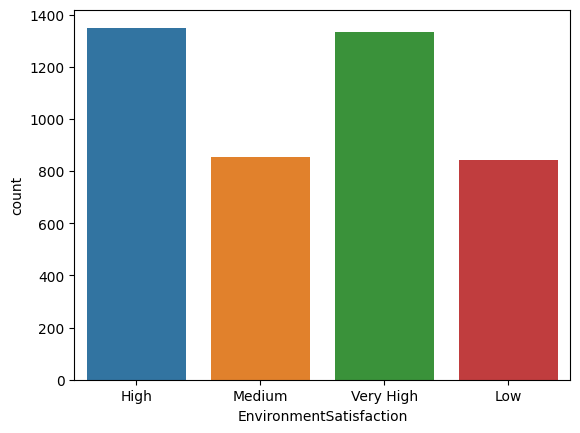

In [20]:
hr['EnvironmentSatisfaction'].value_counts(ascending=False)
sns.countplot(x='EnvironmentSatisfaction',data=hr);

In [21]:
hr['EnvironmentSatisfaction'] = hr['EnvironmentSatisfaction'].fillna('High')
hr['EnvironmentSatisfaction'].isnull().sum()

0

0

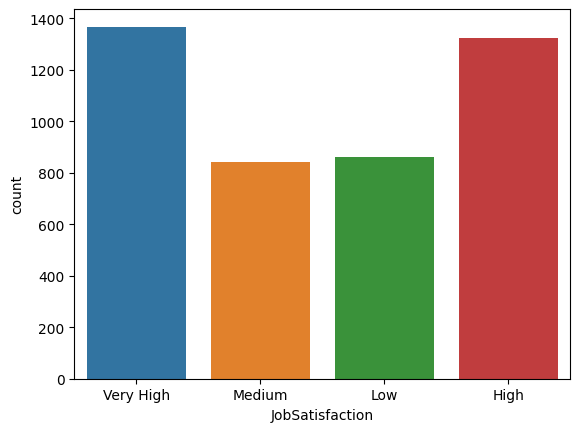

In [22]:
hr['JobSatisfaction'].value_counts(ascending=False)
sns.countplot(x='JobSatisfaction',data=hr);
hr['JobSatisfaction'] = hr['JobSatisfaction'].fillna('High')
hr['JobSatisfaction'].isnull().sum()

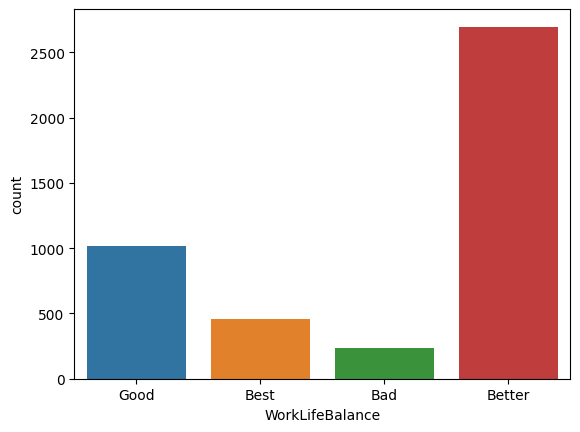

In [23]:
hr['WorkLifeBalance'].value_counts(ascending=False)
hr['WorkLifeBalance'] = hr['WorkLifeBalance'].fillna('Better')
hr['WorkLifeBalance'].isnull().sum()
sns.countplot(x='WorkLifeBalance',data=hr);

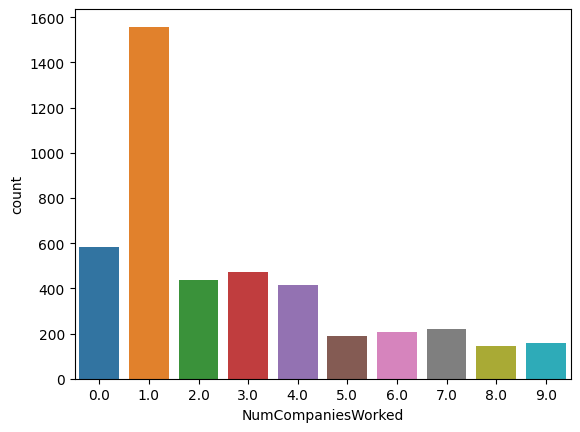

In [24]:
hr['NumCompaniesWorked'].value_counts(ascending=False)
sns.countplot(x='NumCompaniesWorked',data=hr);

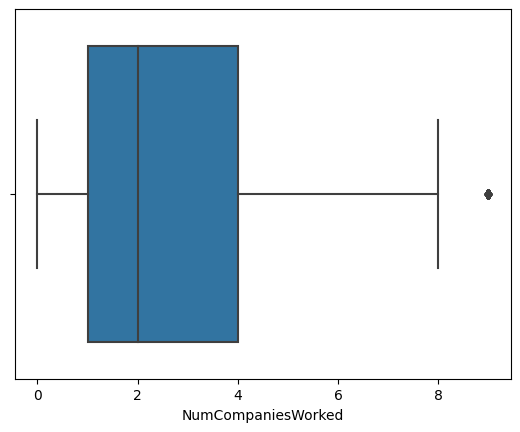

In [25]:
sns.boxplot(x='NumCompaniesWorked',data=hr);

In [26]:
hr['NumCompaniesWorked'] = hr['NumCompaniesWorked'].fillna(2)
hr['NumCompaniesWorked'].isnull().sum()

0

In [27]:
hr['TotalWorkingYears'].value_counts(ascending=False)

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
14.0     93
2.0      93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
25.0     42
26.0     42
28.0     42
0.0      33
29.0     30
31.0     27
32.0     27
27.0     21
30.0     21
33.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

/tmp/ipykernel_34/1488501150.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(hr['TotalWorkingYears'], hist=True, kde=False,


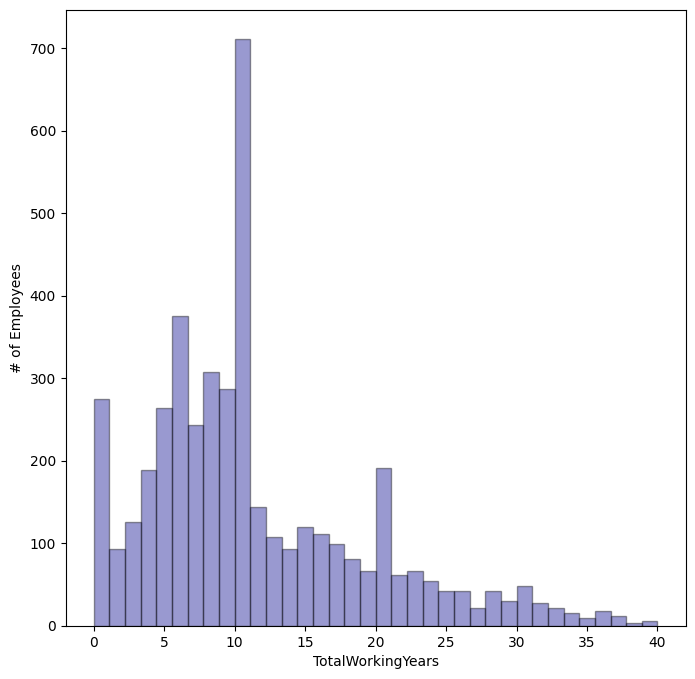

In [28]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hr['TotalWorkingYears'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Employees')
ax.set_xlabel('TotalWorkingYears');

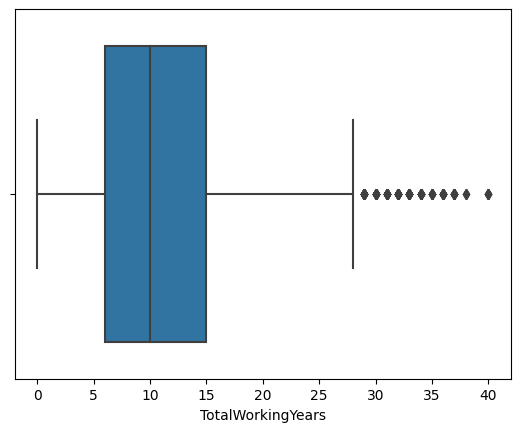

In [29]:
sns.boxplot(x='TotalWorkingYears',data=hr);

In [30]:
hr['TotalWorkingYears'] = hr['TotalWorkingYears'].fillna(2)
hr['TotalWorkingYears'].isnull().sum()

0

In [31]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      4409 non-null   float64
 1   JobInvolvement           4409 non-null   object 
 2   PerformanceRating        4409 non-null   object 
 3   EnvironmentSatisfaction  4409 non-null   object 
 4   JobSatisfaction          4409 non-null   object 
 5   WorkLifeBalance          4409 non-null   object 
 6   Age                      4409 non-null   int64  
 7   Attrition                4409 non-null   object 
 8   BusinessTravel           4409 non-null   object 
 9   Department               4409 non-null   object 
 10  DistanceFromHome         4409 non-null   int64  
 11  Education                4409 non-null   object 
 12  EducationField           4409 non-null   object 
 13  Gender                   4409 non-null   object 
 14  JobLevel                

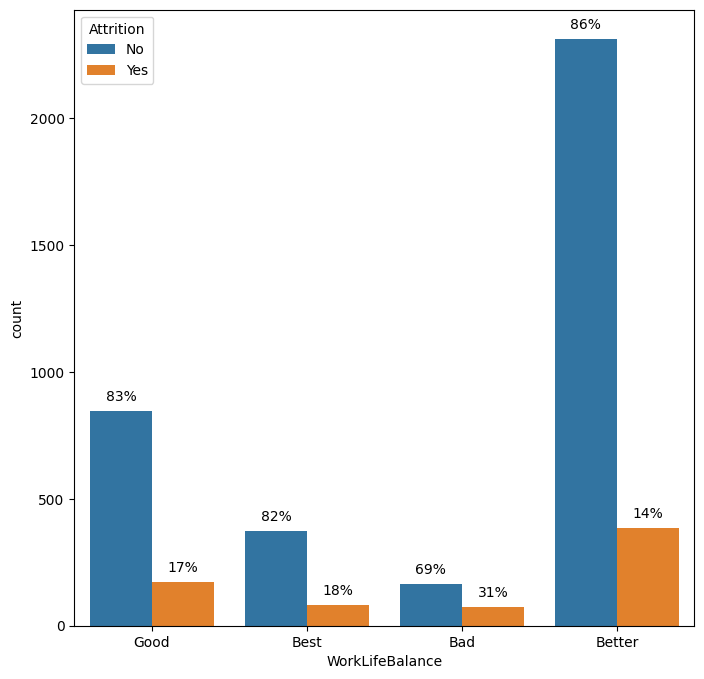

In [32]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='WorkLifeBalance',data=hr,hue="Attrition")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

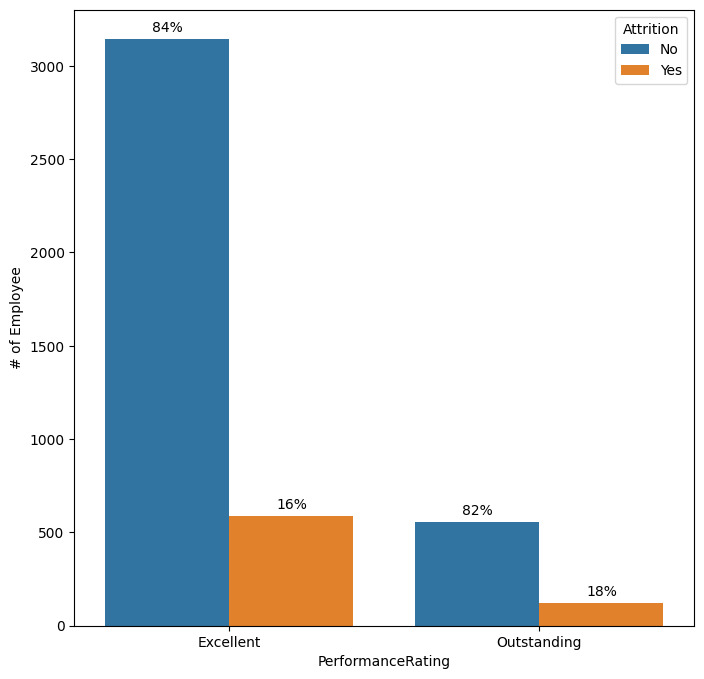

In [33]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='PerformanceRating', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

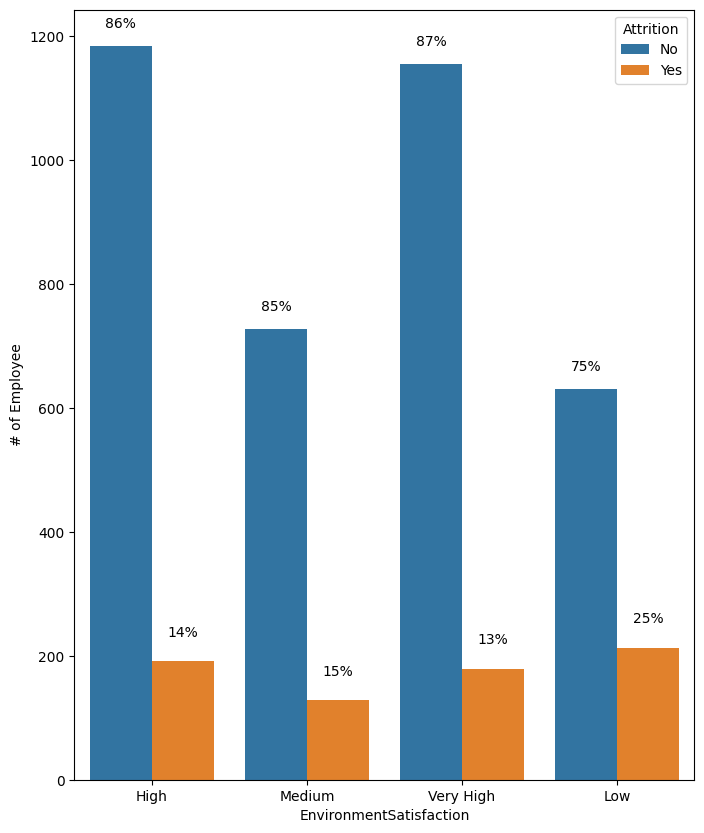

In [34]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x='EnvironmentSatisfaction', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

**Insights**
* Attrition : Whether the employee left in the previous year or not
1. Employee who left in the previous year are 14% of population (1375) i.e. 192 who believe EnvironmentSatisfaction is High in org. in org.
2. Employee who left in the previous year are 15% of population (856) i.e. 129 who believe EnvironmentSatisfaction is Medium in org.
3. Employee who left in the previous year are 13% of population (1334) i.e. 173 who believe EnvironmentSatisfaction is Very High in org.
4. Employee who left in the previous year are 25% of population (845) i.e. 211 who believe EnvironmentSatisfaction is Low in org.
* People who left in the previous year & believe EnvironmentSatisfaction is Low in org were 30% of population who left in the previous year. Second by People who left in the previous year & believe EnvironmentSatisfaction is High in org

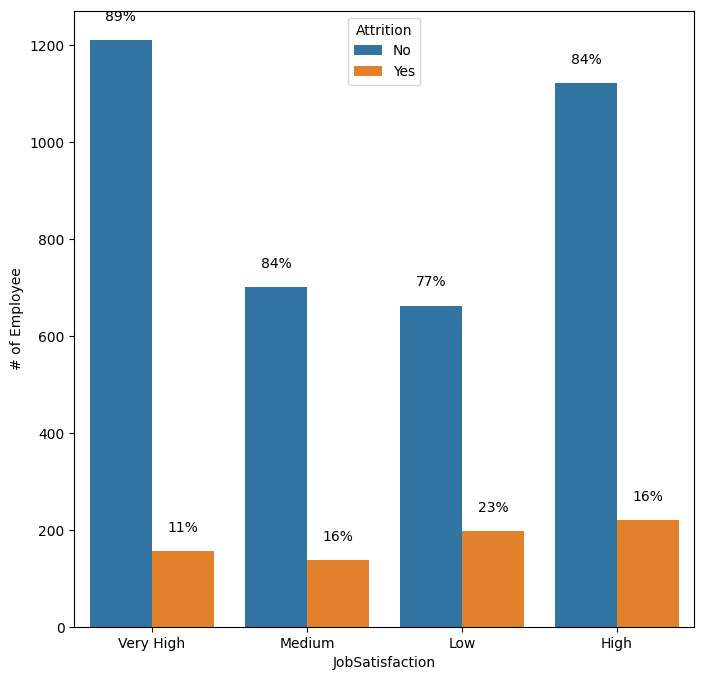

In [35]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='JobSatisfaction', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

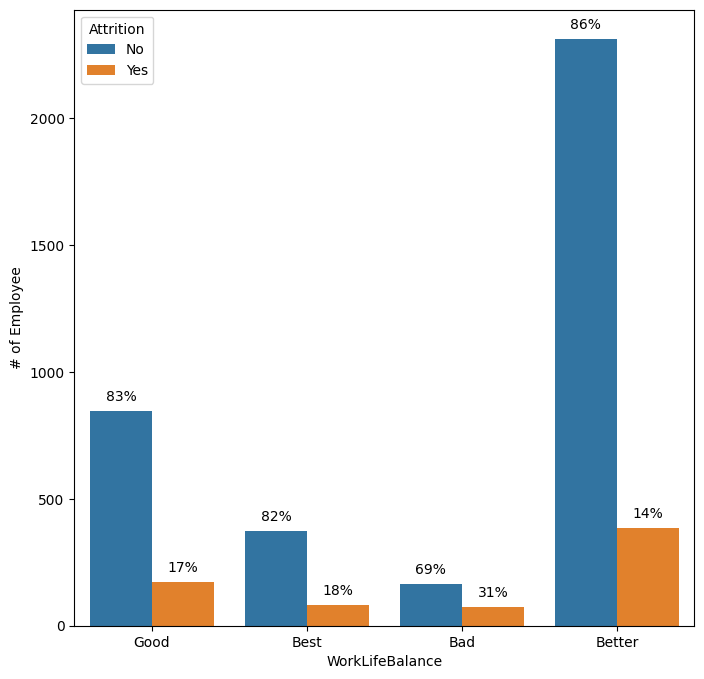

In [36]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='WorkLifeBalance', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

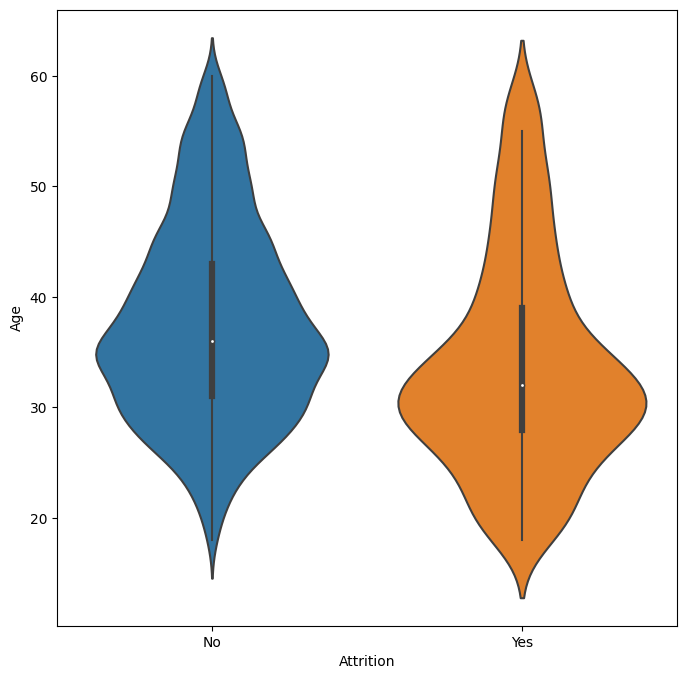

In [37]:
plt.figure(figsize=(8,8))
sns.violinplot(y='Age',x='Attrition',data=hr)
plt.show()

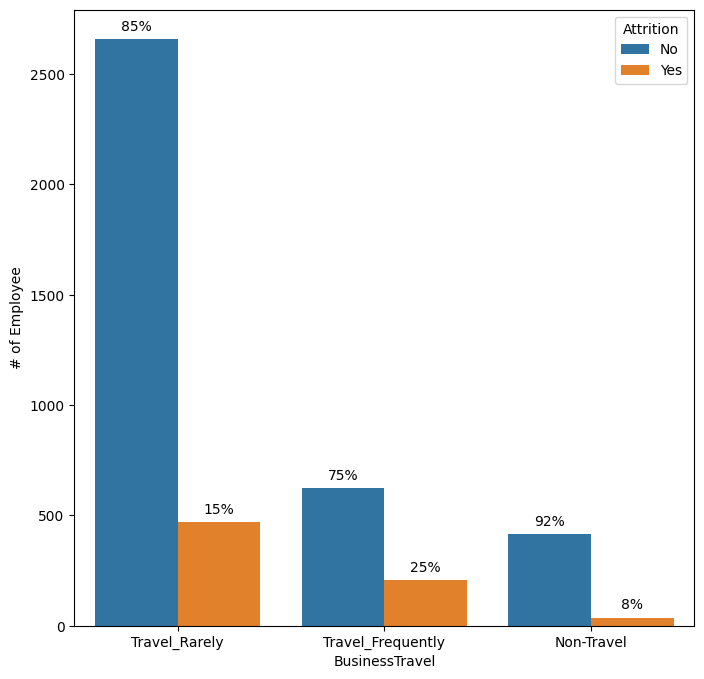

In [38]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='BusinessTravel', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

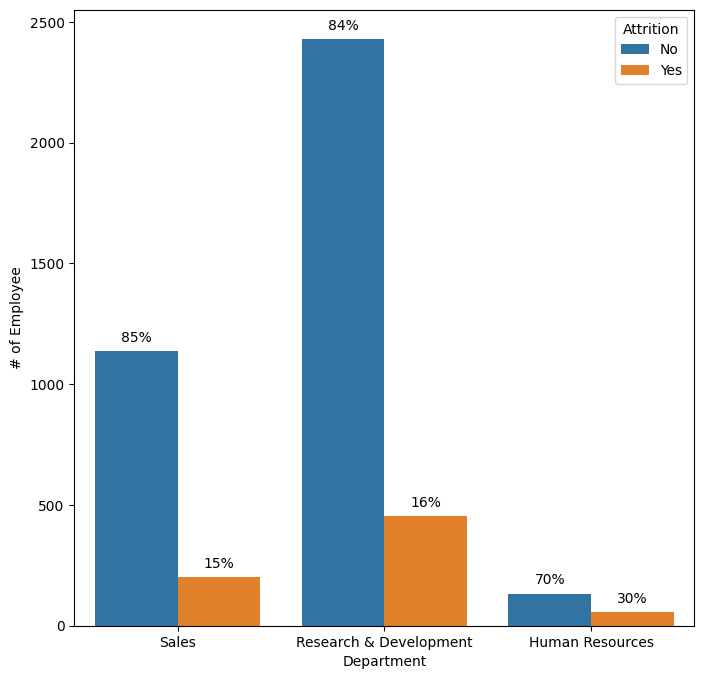

In [39]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Department', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

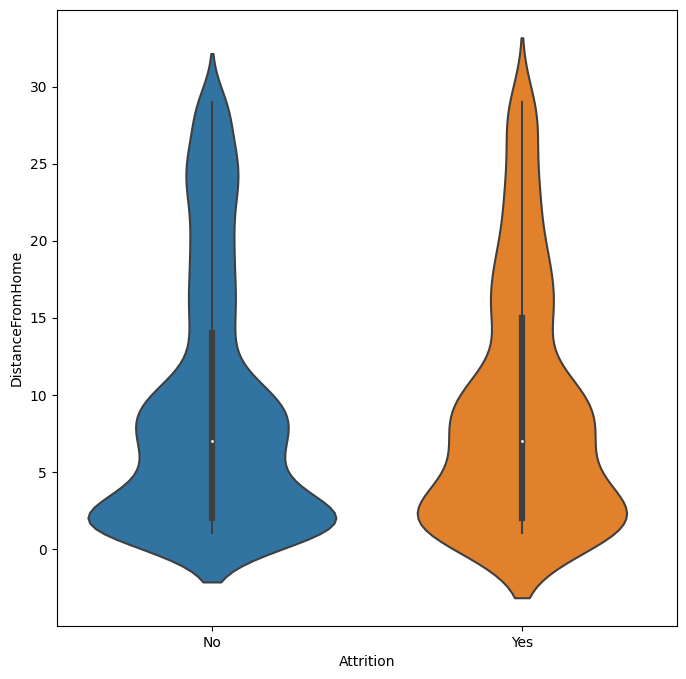

In [40]:
plt.figure(figsize=(8,8))
sns.violinplot(y='DistanceFromHome',x='Attrition',data=hr)

plt.show()

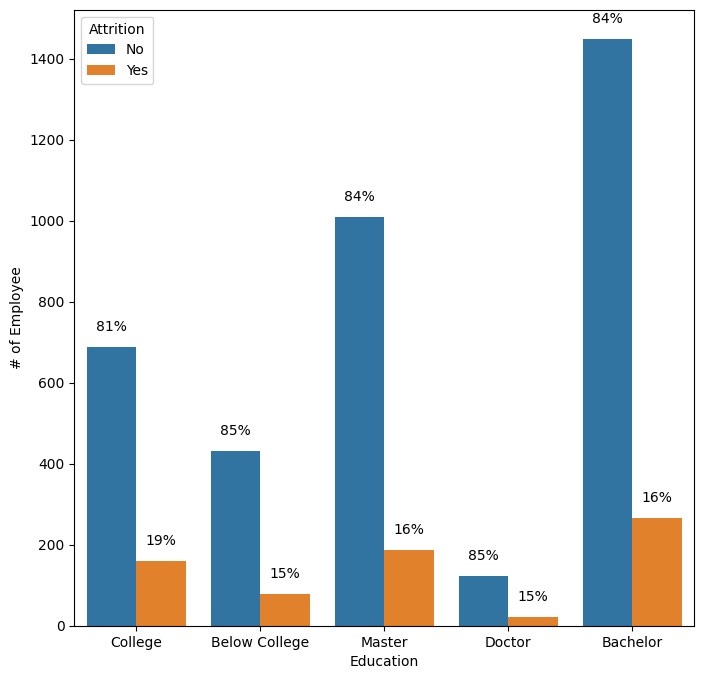

In [41]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Education', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

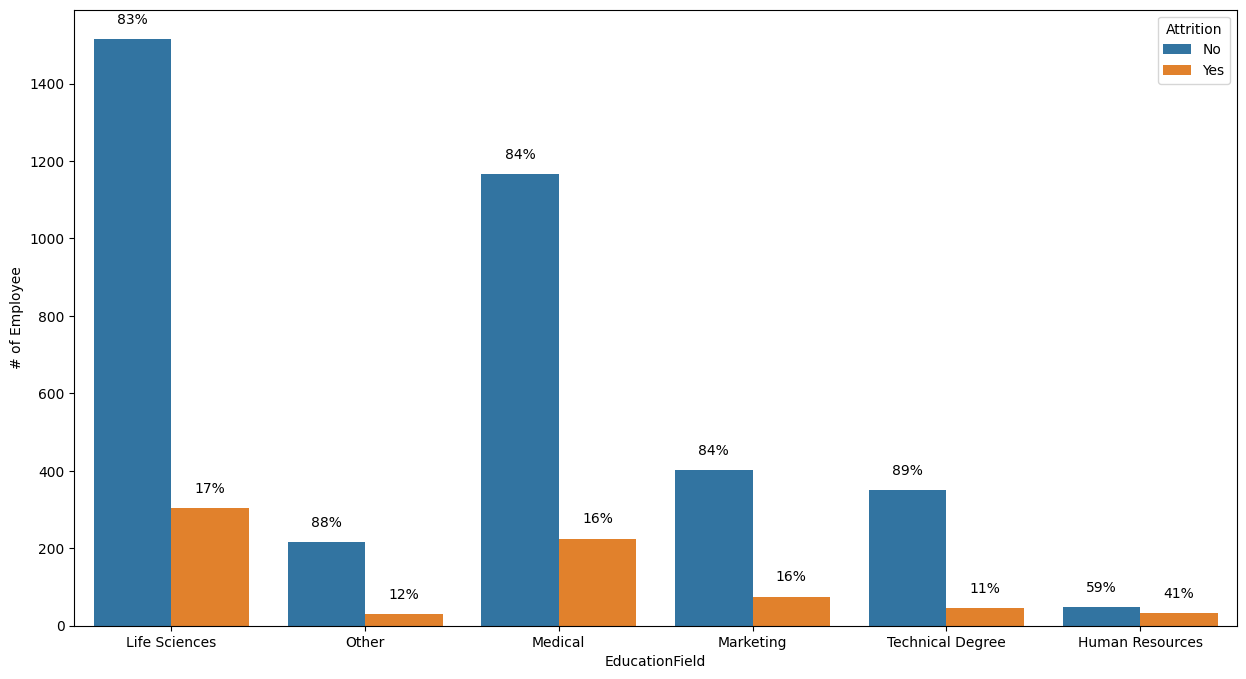

In [42]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='EducationField', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

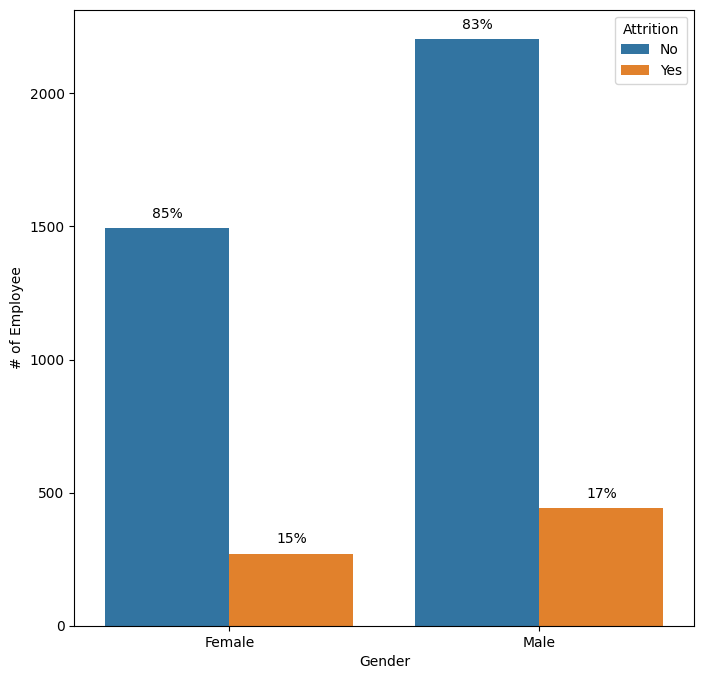

In [43]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Gender', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

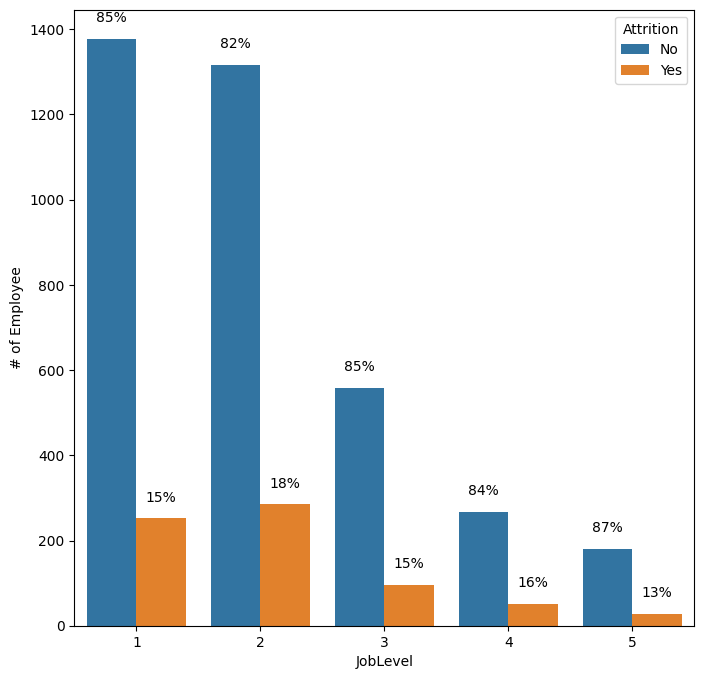

In [44]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='JobLevel', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

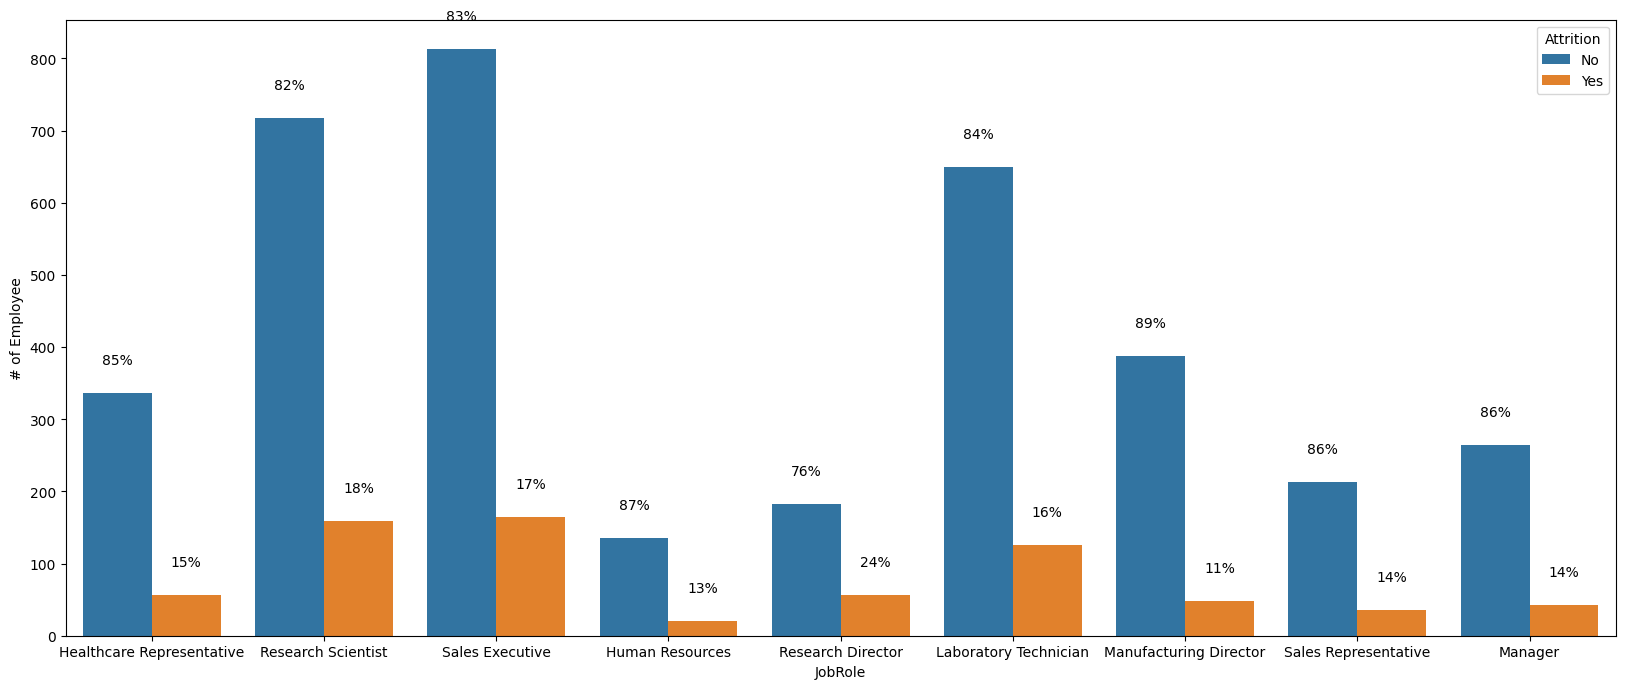

In [45]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='JobRole', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

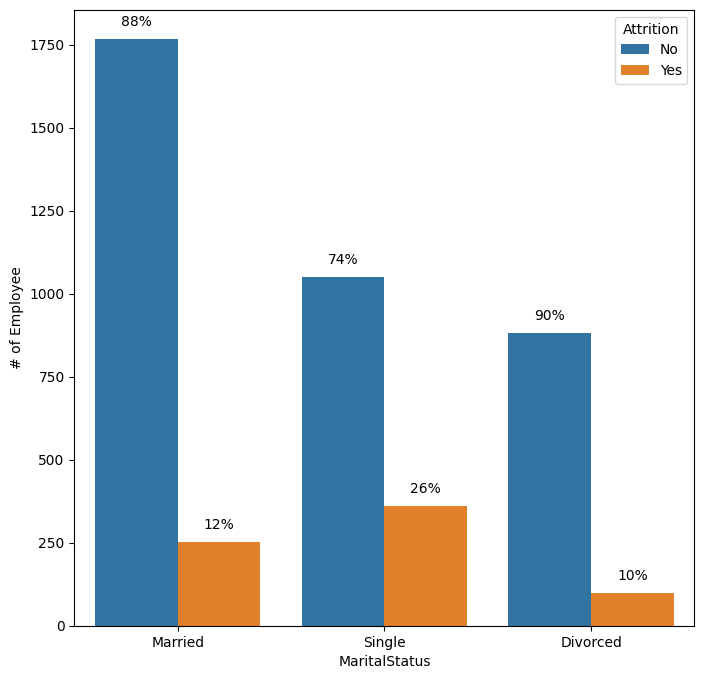

In [46]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='MaritalStatus', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

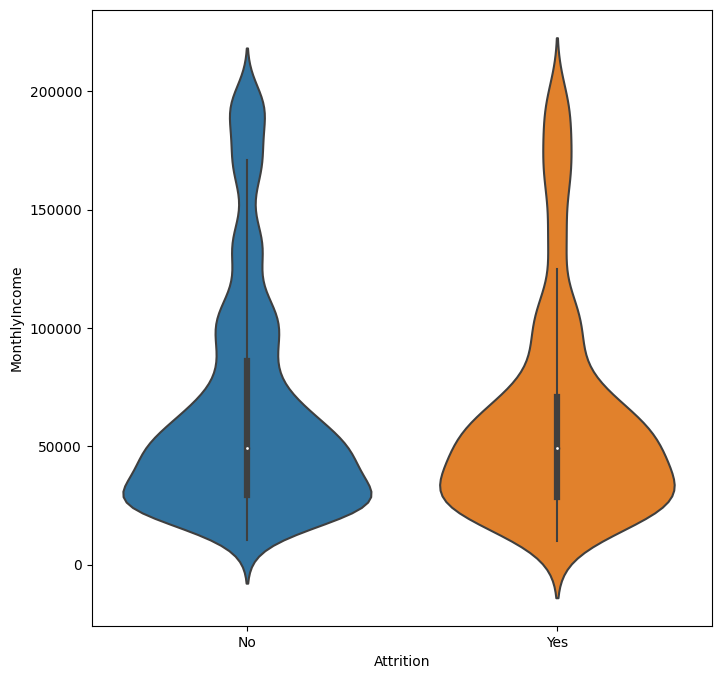

In [47]:
plt.figure(figsize=(8,8))
sns.violinplot(y='MonthlyIncome',x='Attrition',data=hr)

plt.show()

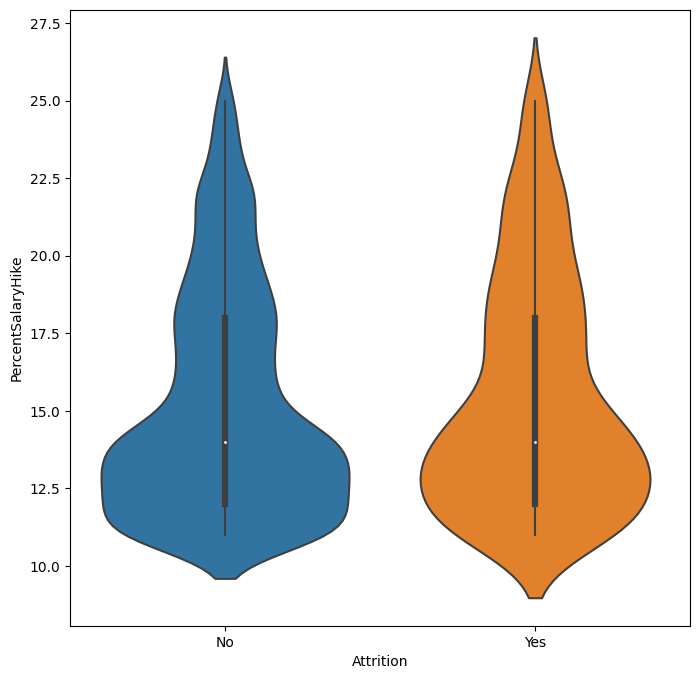

In [48]:
plt.figure(figsize=(8,8))
sns.violinplot(y='PercentSalaryHike',x='Attrition',data=hr)

plt.show()

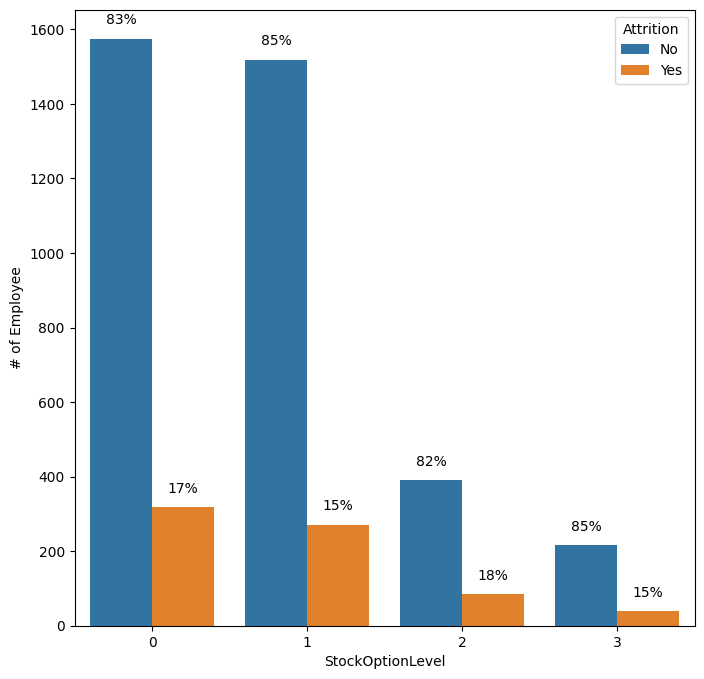

In [49]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='StockOptionLevel', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

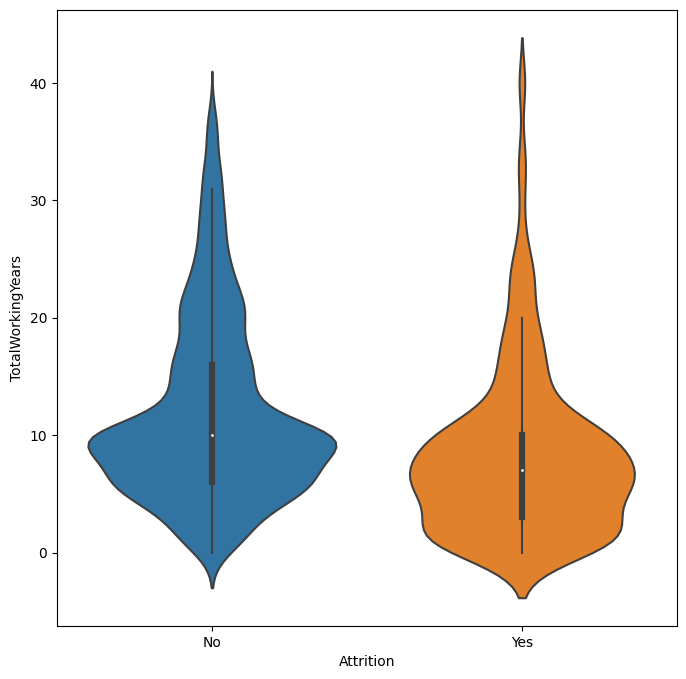

In [50]:
plt.figure(figsize=(8,8))
sns.violinplot(y='TotalWorkingYears',x='Attrition',data=hr)

plt.show()

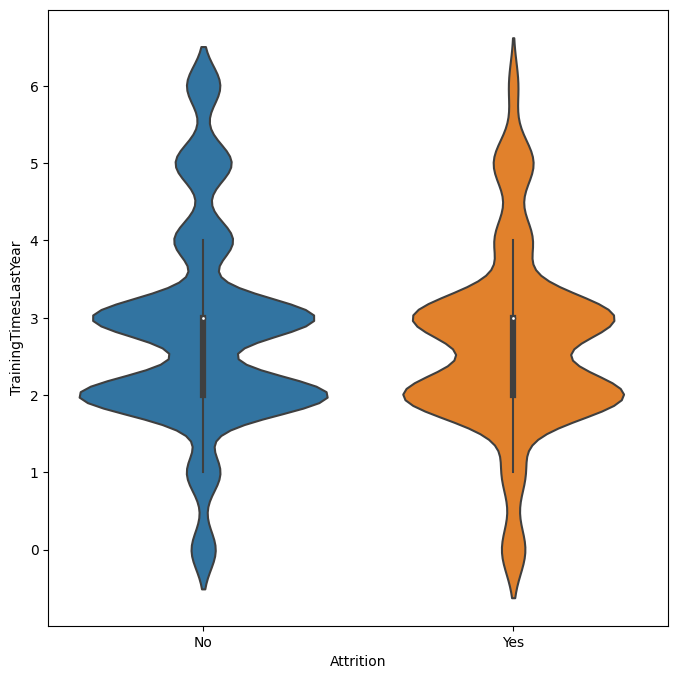

In [51]:
plt.figure(figsize=(8,8))
sns.violinplot(y='TrainingTimesLastYear',x='Attrition',data=hr)

plt.show()

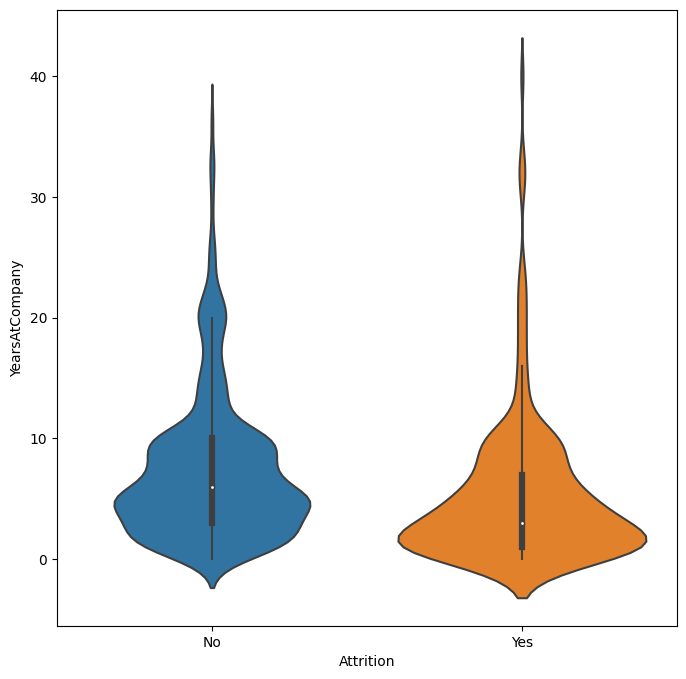

In [52]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsAtCompany',x='Attrition',data=hr)

plt.show()

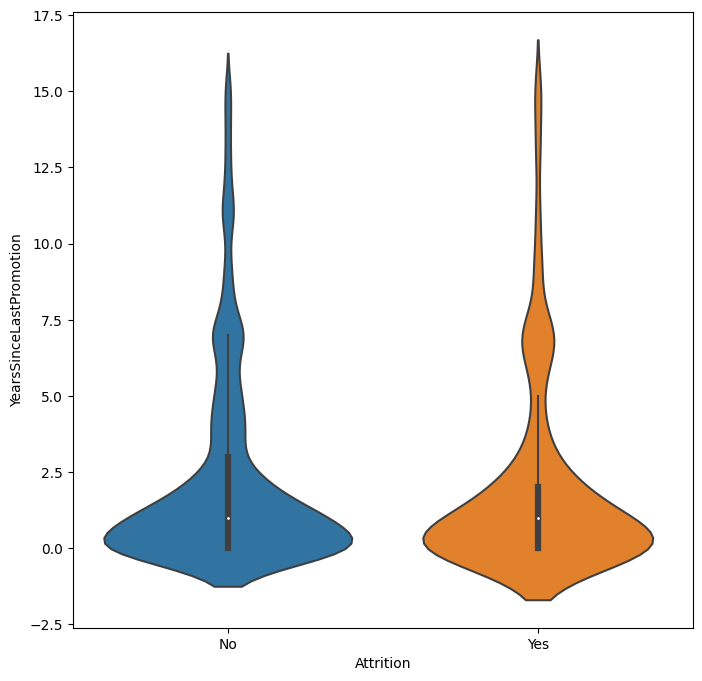

In [53]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsSinceLastPromotion',x='Attrition',data=hr)

plt.show()

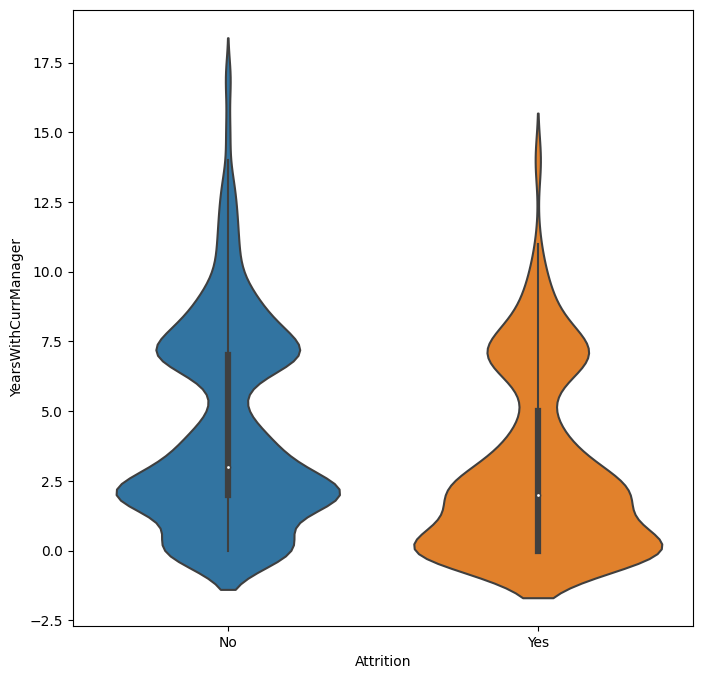

In [54]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsWithCurrManager',x='Attrition',data=hr)

plt.show()

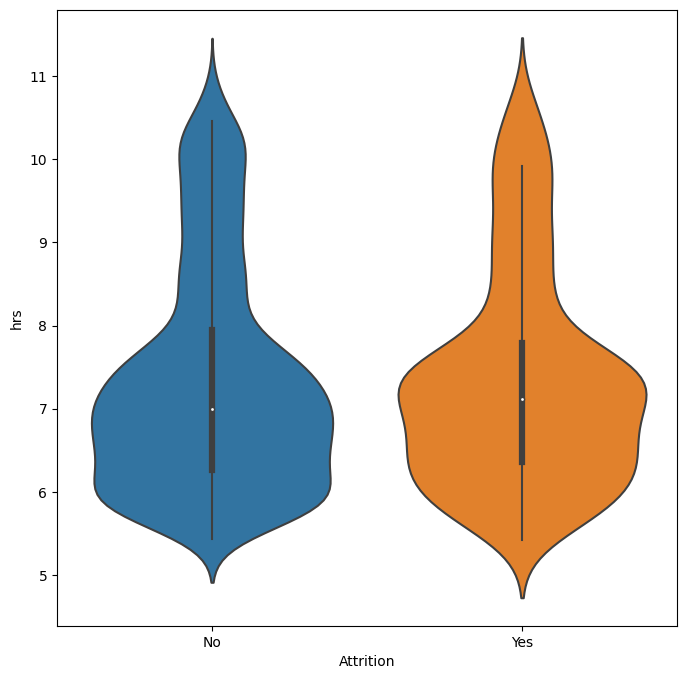

In [55]:
plt.figure(figsize=(8,8))
sns.violinplot(y='hrs',x='Attrition',data=hr)

plt.show()

/tmp/ipykernel_34/1947016572.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr.corr(), annot = True, cmap="Accent");


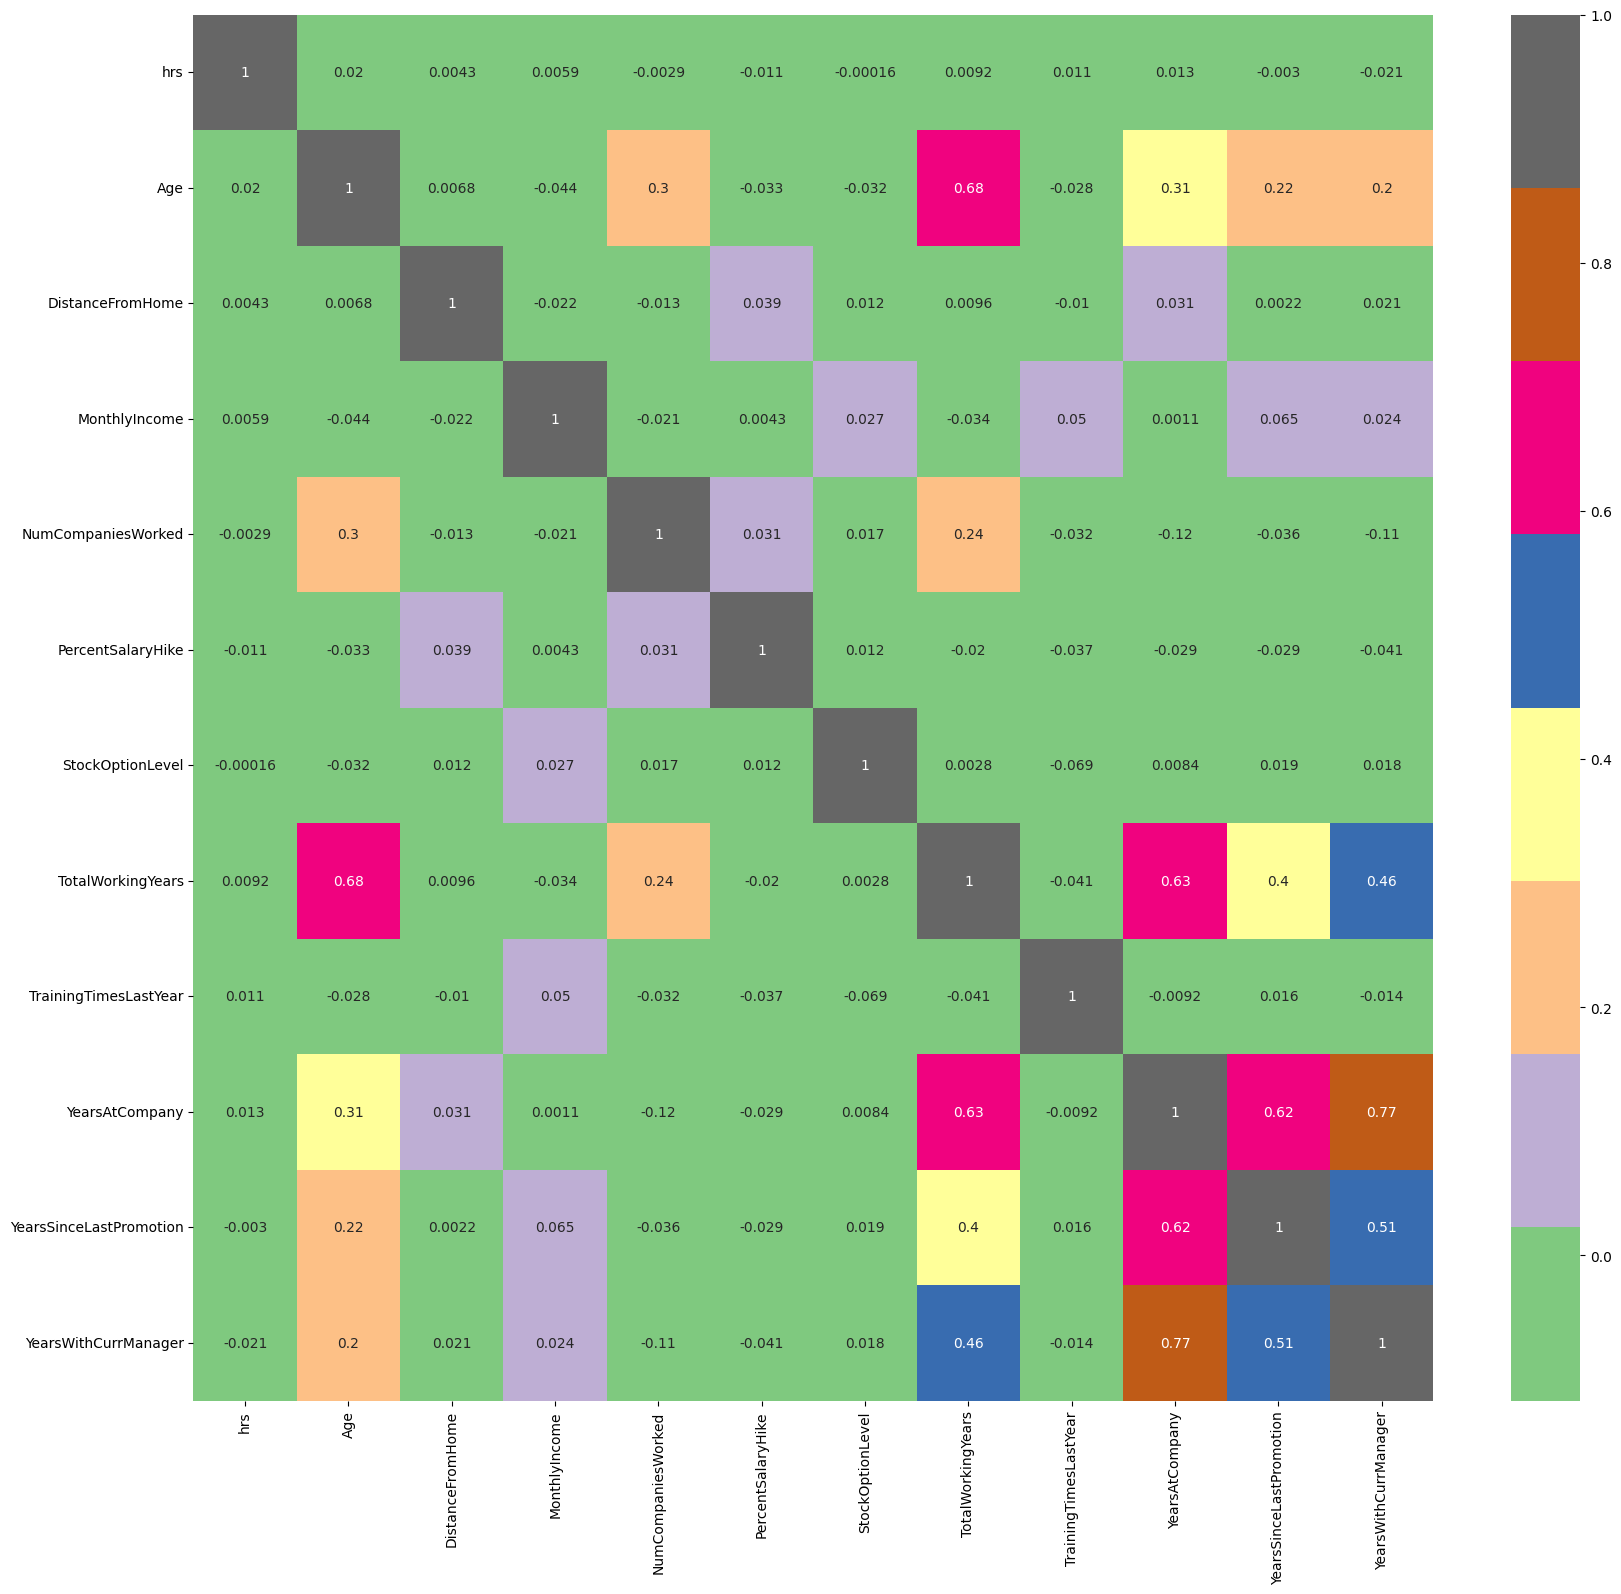

In [56]:
plt.figure(figsize=(20,18))
sns.heatmap(hr.corr(), annot = True, cmap="Accent");

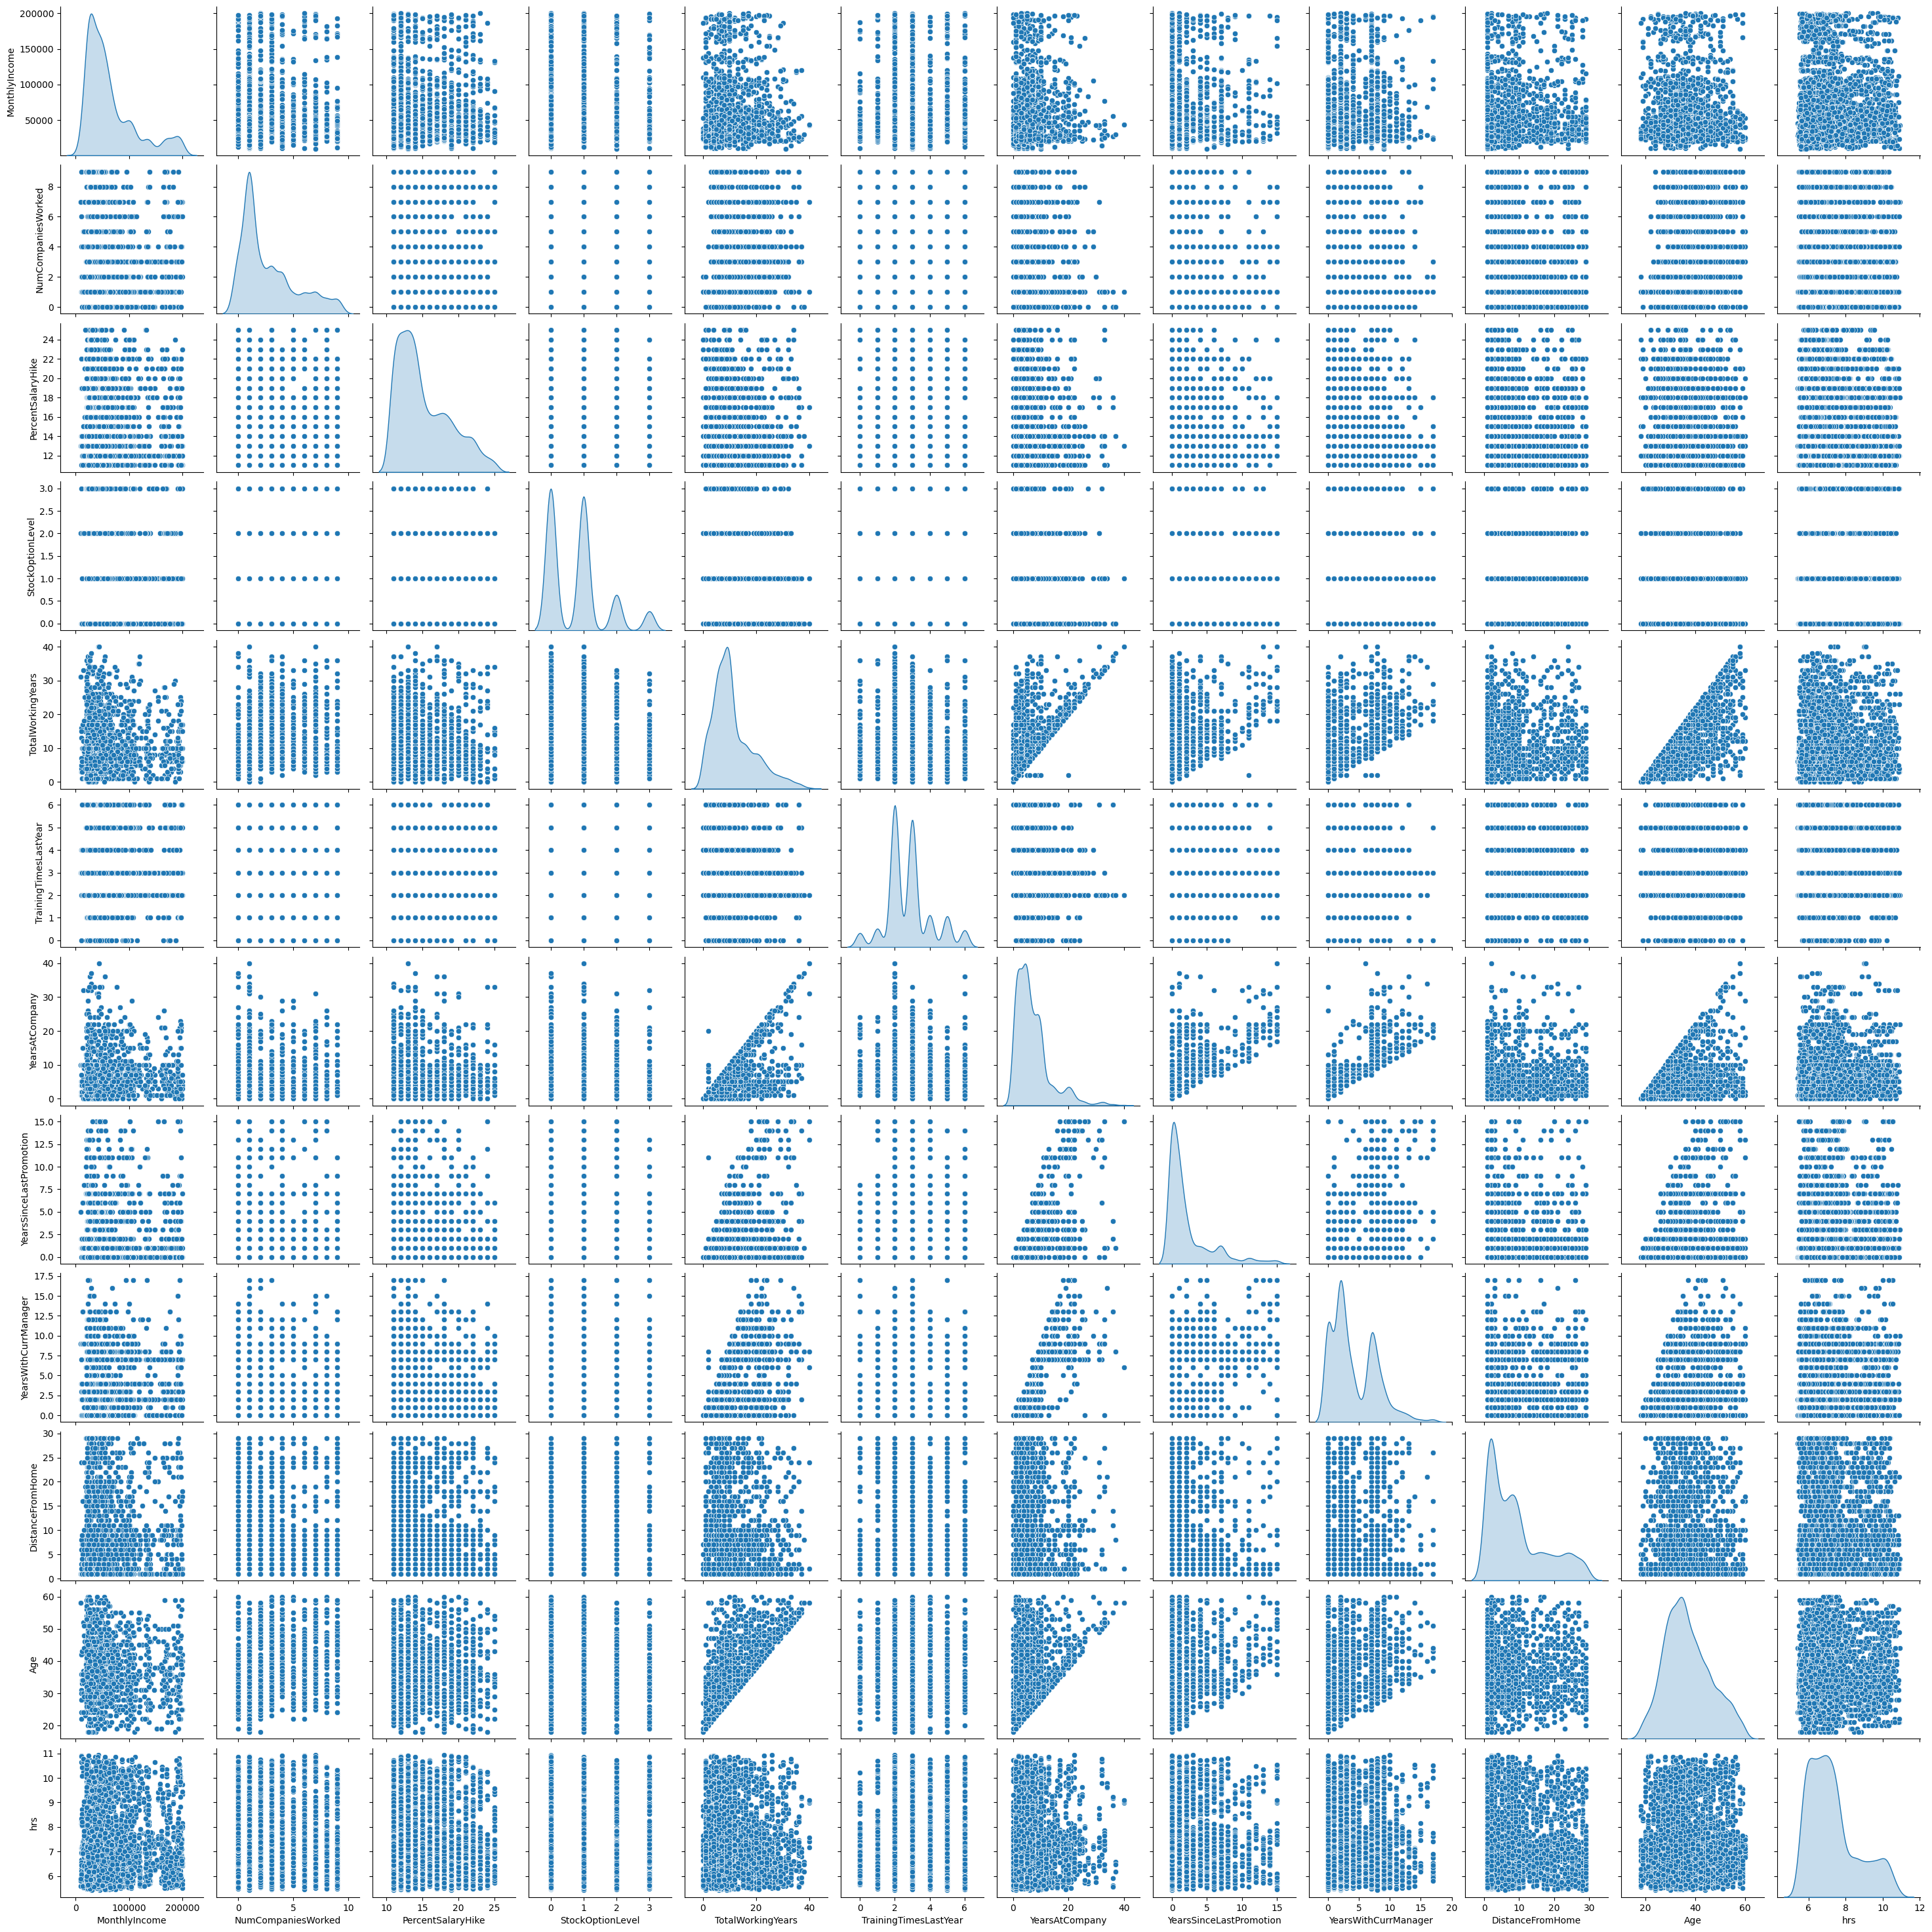

In [57]:
hr_num=hr[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']]

sns.pairplot(hr_num, diag_kind='kde')
plt.show()

In [58]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(hr[['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
                                 'JobSatisfaction', 'WorkLifeBalance','BusinessTravel', 'Department',
                                 'Education','EducationField', 'Gender', 'JobLevel', 'JobRole',
                                 'MaritalStatus']], drop_first=True)

# Adding the results to the master dataframe
hr = pd.concat([hr, dummy1], axis=1)

/tmp/ipykernel_34/2816635539.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy1 = pd.get_dummies(hr[['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',


In [59]:
# We have created dummies for the below variables, so we can drop them
hr = hr.drop(['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
                                 'JobSatisfaction', 'WorkLifeBalance','BusinessTravel', 'Department',
                                 'Education','EducationField', 'Gender', 'JobLevel', 'JobRole',
                                 'MaritalStatus'], 1)

/tmp/ipykernel_34/4214758029.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hr = hr.drop(['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',


In [60]:
hr['Attrition'] = hr['Attrition'].replace({'Yes': 1, "No": 0})

In [61]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = hr.drop(['Attrition'], axis=1)

X.head()

hrs  Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0   7.315971   51                 6         131160                 1.0   
1   6.816081   31                10          41890                 0.0   
2   6.789215   32                17         193280                 1.0   
3   7.877561   38                 2          83210                 3.0   
4  10.275802   32                10          23420                 4.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
0                     0                   0                      0   
1                     4                   0                      1   
2                     3                   0                      0   
3                     5                   0                      1   
4                     4                   0                      0   

   JobInvolvement_Very High  PerformanceRating_Outstanding  \
0                         0                              0   
1                         0                              1   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
0                            0                               0   
1                            0                               0   
2                            0                               1   
3                            0                               0   
4                            0                               0   

   EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
0                                  0                    0   
1                                  0                    0   
2                                  0                    0   
3                                  1                    0   
4                                  1                    1   

   JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
0                       0                          1                     0   
1                       1                          0                     1   
2                       1                          0                     0   
3                       0                          1                     0   
4                       0                          0                     0   

   WorkLifeBalance_Better  WorkLifeBalance_Good  \
0                       0                     1   
1                       0                     0   
2                       0                     0   
3                       1                     0   
4                       1                     0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0                             1   

   Department_Research & Developm

In [62]:
# Putting response variable to y
y = hr['Attrition']

y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
X_train.head()

hrs  Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
537   10.506000   37                 7          71430                 2.0   
1881   7.049634   39                10          66960                 7.0   
2367   7.044587   39                 2          72640                 0.0   
3618   7.767506   45                19          36810                 3.0   
1398   5.761795   40                11          70050                 1.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
537                  21                 0                8.0   
1881                 11                 0                8.0   
2367                 17                 0                2.0   
3618                 17                 1               22.0   
1398                 20                 2               21.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
537                       6               1                        0   
1881                      3               2                        2   
2367                      5              10                        0   
3618                      2               0                        0   
1398                      2              20                        9   

      YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
537                      0                   0                      1   
1881                     2                   0                      0   
2367                     7                   0                      0   
3618                     0                   0                      0   
1398                     9                   0                      0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
537                          0                              1   
1881                         0                              0   
2367                         0                              0   
3618                         0                              0   
1398                         0                              1   

      EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
537                             0                               0   
1881                            0                               0   
2367                            0                               0   
3618                            0                               1   
1398                            0                               0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
537                                   1                    0   
1881                                  1                    1   
2367                                  0                    0   
3618                                  0                    0   
1398                                  1                    0   

      JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
537                        0                          1                     0   
1881                       0                          0                     0   
2367                       0                          0                     0   
3618                       1                          0                     0   
1398                       0                          0                     0   

      WorkLifeBalance_Better  WorkLifeBalance_Good  \
537                        1                     0   
1881                       0                     0   
2367                       1                     0   
3618                       1                     0   
1398                       1                     0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
537                                  0                             1   
1881                                 0                             1   
2367                                 0                             1   
3

In [65]:
X_train.shape

(3086, 53)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']] = scaler.fit_transform(X_train[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']])

X_train.head()

hrs       Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
537   2.429327  0.020339         -0.282194       0.141772           -0.278151   
1881 -0.175435  0.239422          0.088223       0.046708            1.737760   
2367 -0.179239  0.239422         -0.899556       0.167505           -1.084516   
3618  0.365562  0.896672          1.199474      -0.594493            0.125031   
1398 -1.145968  0.348964          0.211695       0.112423           -0.681334   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
537            1.579773         -0.935020          -0.413179   
1881          -1.160323         -0.935020          -0.413179   
2367           0.483734         -0.935020          -1.188690   
3618           0.483734          0.237936           1.396347   
1398           1.305763          1.410893           1.267095   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
537                2.498059       -0.985765                -0.689611   
1881               0.154895       -0.820174                -0.065889   
2367               1.717004        0.504553                -0.689611   
3618              -0.626160       -1.151356                -0.689611   
1398              -0.626160        2.160462                 2.117139   

      YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
537              -1.157795                   0                      1   
1881             -0.597068                   0                      0   
2367              0.804751                   0                      0   
3618             -1.157795                   0                      0   
1398              1.365479                   0                      0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
537                          0                              1   
1881                         0                              0   
2367                         0                              0   
3618                         0                              0   
1398                         0                              1   

      EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
537                             0                               0   
1881                            0                               0   
2367                            0                               0   
3618                            0                               1   
1398                            0                               0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
537                                   1                    0   
1881                                  1                    1   
2367                                  0                    0   
3618                                  0                    0   
1398                                  1                    0   

      JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
537                        0                          1                     0   
1881                       0                          0                     0   
2367                       0                          0                     0   
3618                       1                          0                     0   
1398                       0                          0                     0   

      WorkLifeBalance_Better  WorkLifeBalance_Good  \
537                        1                     0   
1881                       0                     0   
2367                       1                     0   
3618                       1                     0   
1398                       1                     0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
537                                  0                             1   
1881                                 0                             1   
2367                                 0          

In [67]:
X_test[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']] = scaler.transform(X_test[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']])

X_test.head()

hrs       Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
4019  0.001523 -0.965535          2.434197       0.079884           -0.681334   
1697  1.063991 -1.075076          1.569891      -0.908182           -1.084516   
2481 -0.171973  0.677589          0.829057       0.064998           -1.084516   
1039  0.420040 -1.184618         -0.899556       0.021613           -1.084516   
93   -0.327932 -0.527368         -0.899556      -0.155116           -0.681334   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
4019           0.757744          0.237936          -1.317942   
1697          -0.338294          0.237936          -0.671682   
2481           0.209725          0.237936          -0.154675   
1039          -0.064285          1.410893          -0.671682   
93            -0.612304         -0.935020          -0.413179   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
4019              -0.626160       -0.985765                -0.689611   
1697               0.935950       -0.323401                -0.689611   
2481              -0.626160        0.338962                -0.377750   
1039               0.154895       -0.323401                -0.377750   
93                -2.188269        0.173371                -0.689611   

      YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
4019             -1.157795                   0                      0   
1697             -0.316704                   0                      0   
2481              1.085115                   0                      0   
1039             -0.036340                   0                      1   
93                0.804751                   0                      0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
4019                         1                              0   
1697                         0                              0   
2481                         0                              0   
1039                         0                              0   
93                           0                              0   

      EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
4019                            0                               1   
1697                            1                               0   
2481                            0                               1   
1039                            0                               0   
93                              0                               0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
4019                                  0                    0   
1697                                  0                    0   
2481                                  0                    0   
1039                                  1                    0   
93                                    0                    0   

      JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
4019                       1                          0                     0   
1697                       0                          0                     0   
2481                       0                          1                     0   
1039                       1                          0                     0   
93                         1                          0                     0   

      WorkLifeBalance_Better  WorkLifeBalance_Good  \
4019                       1                     0   
1697                       0                     1   
2481                       1                     0   
1039                       1                     0   
93                         1                     0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
4019                                 0                             1   
1697                                 0                             1   
2481                                 0          

In [68]:
### Checking the Attrition Rate
Attrition = (sum(hr['Attrition'])/len(hr['Attrition'].index))*100
Attrition

16.126105692900886

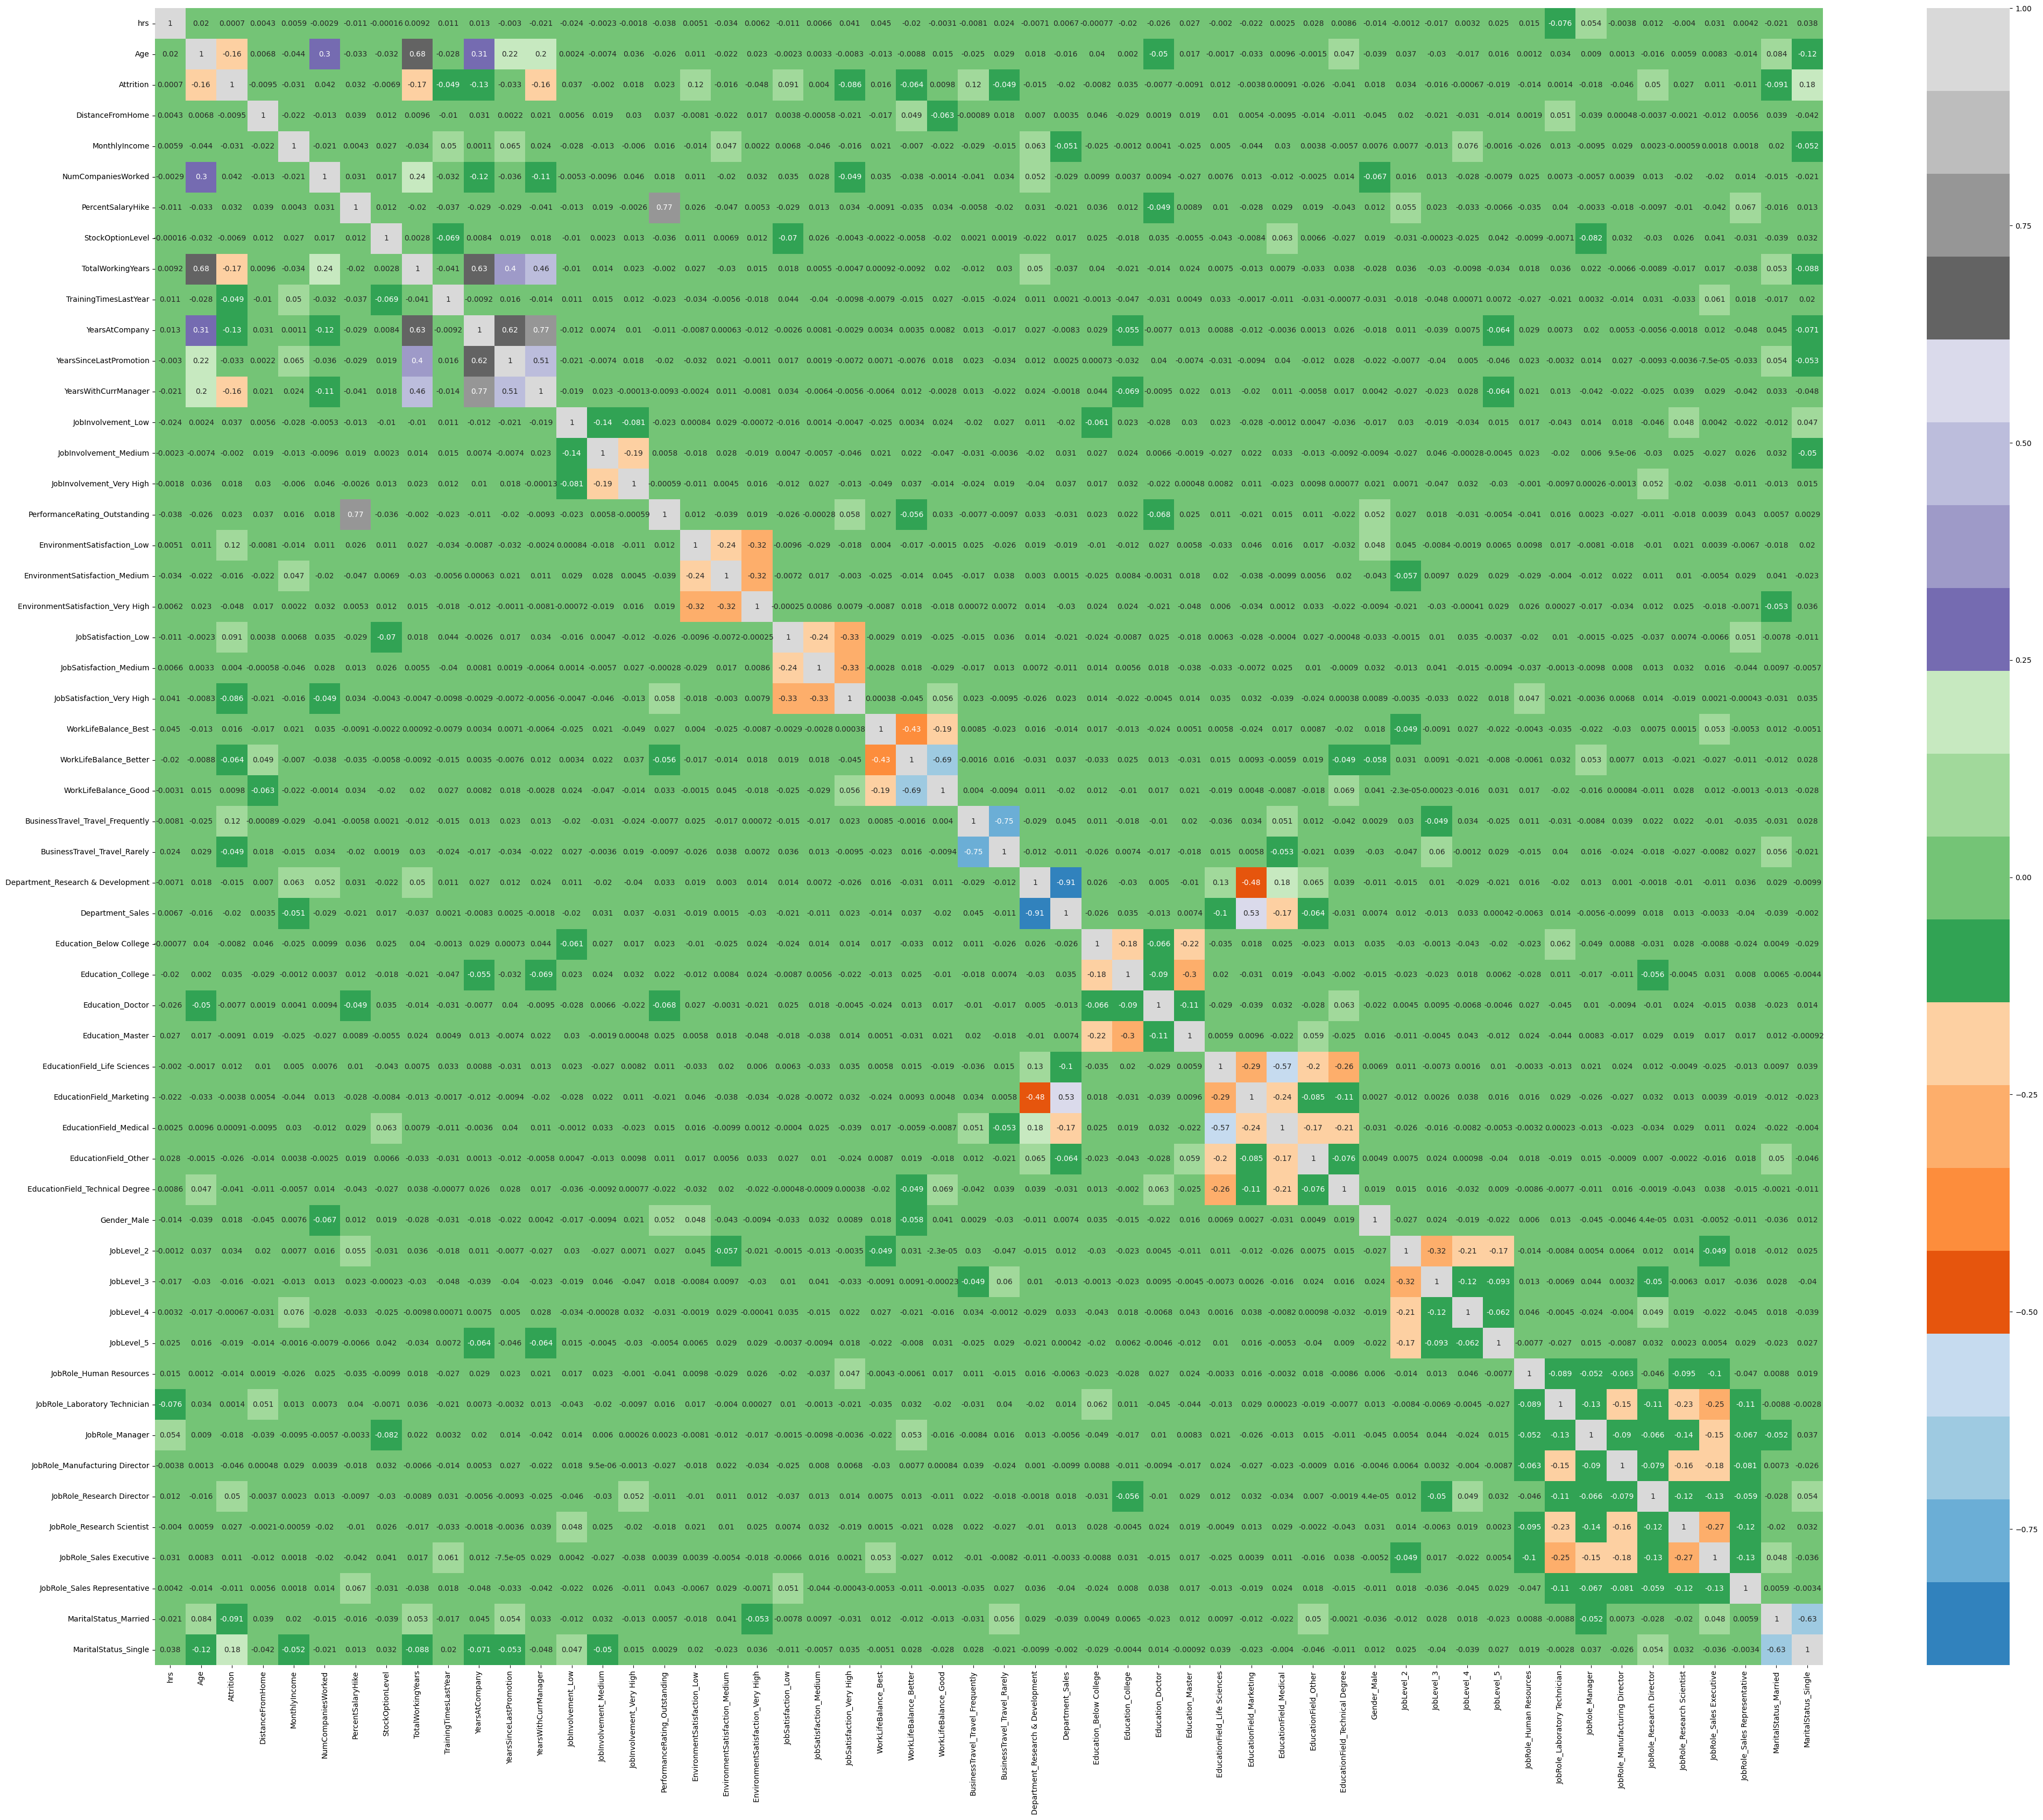

In [69]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,40))   
sns.heatmap(hr.corr(),annot = True,cmap="tab20c")
plt.show()

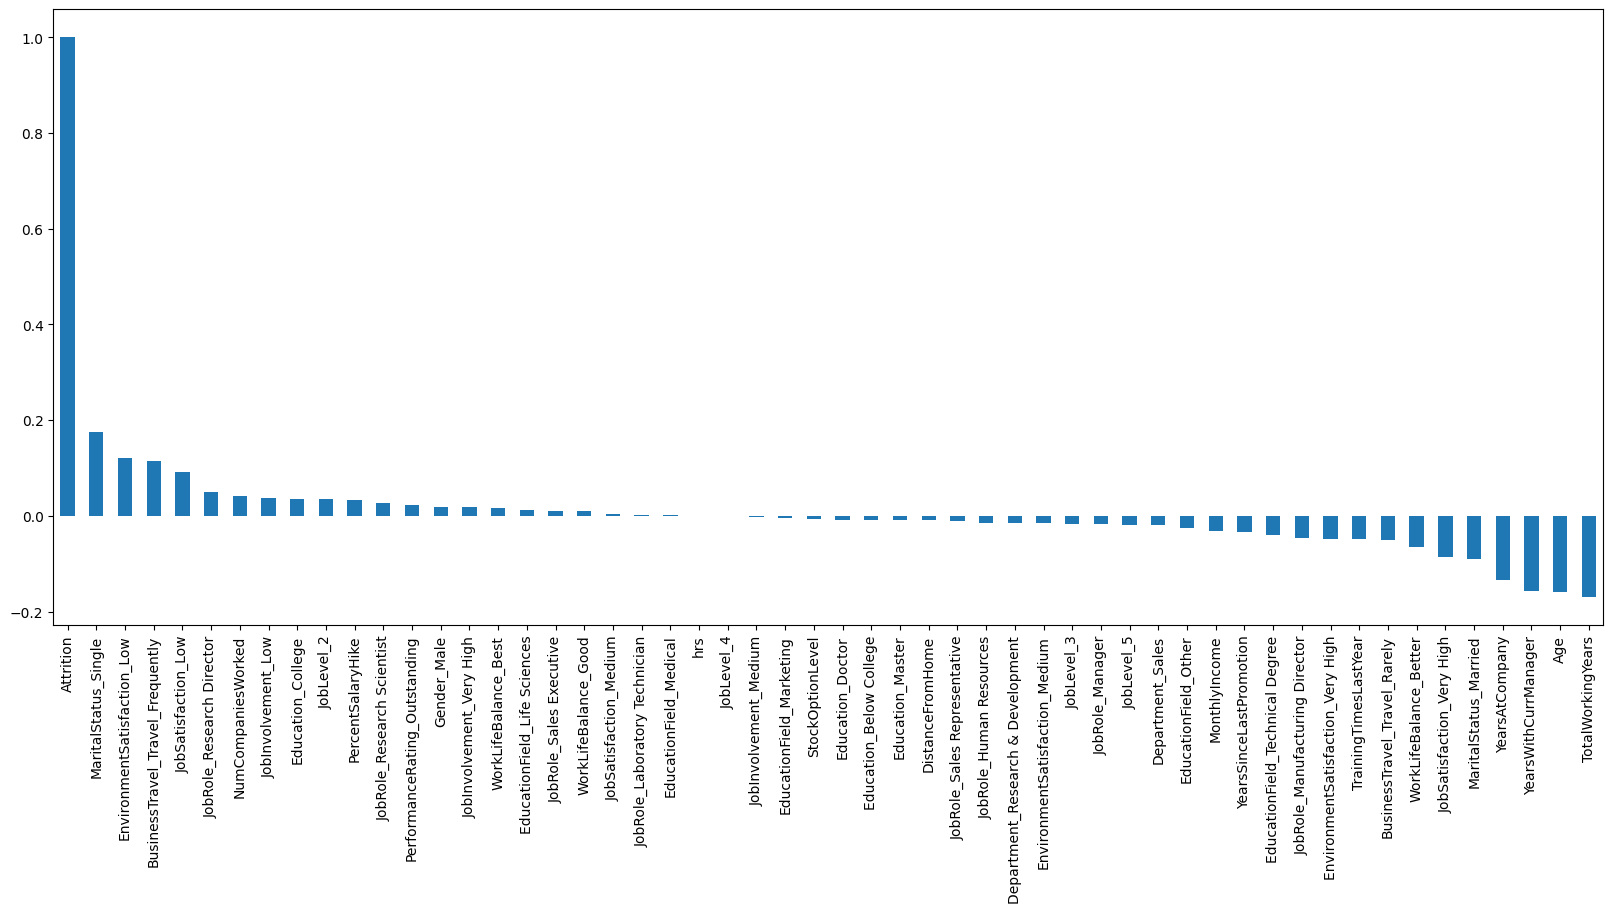

In [70]:
plt.figure(figsize=(20,8))
hr.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [71]:
corrmat = X_train.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
matrix= corrdf.sort_values(by = 'Correlation', ascending = False).head(50)
matrix

/tmp/ipykernel_34/2583708761.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))


Var1                               Var2  \
1511                   Department_Sales  Department_Research & Development   
592                YearsWithCurrManager                     YearsAtCompany   
800       PerformanceRating_Outstanding                  PercentSalaryHike   
1403       BusinessTravel_Travel_Rarely   BusinessTravel_Travel_Frequently   
1295               WorkLifeBalance_Good             WorkLifeBalance_Better   
372                   TotalWorkingYears                                Age   
2807               MaritalStatus_Single              MaritalStatus_Married   
484                      YearsAtCompany                  TotalWorkingYears   
539             YearsSinceLastPromotion                     YearsAtCompany   
1888             EducationField_Medical       EducationField_Life Sciences   
1830           EducationField_Marketing                   Department_Sales   
593                YearsWithCurrManager            YearsSinceLastPromotion   
1829           EducationField_Marketing  Department_Research & Development   
590                YearsWithCurrManager                  TotalWorkingYears   
1241             WorkLifeBalance_Better               WorkLifeBalance_Best   
537             YearsSinceLastPromotion                  TotalWorkingYears   
1133          JobSatisfaction_Very High             JobSatisfaction_Medium   
1132          JobSatisfaction_Very High                JobSatisfaction_Low   
2159                         JobLevel_3                         JobLevel_2   
971   EnvironmentSatisfaction_Very High     EnvironmentSatisfaction_Medium   
970   EnvironmentSatisfaction_Very High        EnvironmentSatisfaction_Low   
478                      YearsAtCompany                                Age   
213                  NumCompaniesWorked                                Age   
1726                   Education_Master                  Education_College   
1835           EducationField_Marketing       EducationField_Life Sciences   
2645            JobRole_Sales Executive         JobRole_Research Scientist   
1994    EducationField_Technical Degree       EducationField_Life Sciences   
1079             JobSatisfaction_Medium                JobSatisfaction_Low   
2641            JobRole_Sales Executive      JobRole_Laboratory Technician   
1889             EducationField_Medical           EducationField_Marketing   
375                   TotalWorkingYears                 NumCompaniesWorked   
917      EnvironmentSatisfaction_Medium        EnvironmentSatisfaction_Low   
2588         JobRole_Research Scientist      JobRole_Laboratory Technician   
1725                   Education_Master            Education_Below College   
1996    EducationField_Technical Degree             EducationField_Medical   
2212                         JobLevel_4                         JobLevel_2   
584                YearsWithCurrManager                                Age   
755            JobInvolvement_Very High              JobInvolvement_Medium   
1941               EducationField_Other       EducationField_Life Sciences   
531             YearsSinceLastPromotion                                Age   
1294               WorkLifeBalance_Good               WorkLifeBalance_Best   
2643            JobRole_Sales Executive     JobRole_Manufacturing Director   
1619                  Education_College            Education_Below College   
1943               EducationField_Other             EducationField_Medical   
2265                         JobLevel_5                         JobLevel_2   
1882             EducationField_Medical  Department_Research & Development   
2590         JobRole_Research Scientist     JobRole_Manufacturing Director   
1883             EducationField_Medical                   Department_Sales   
2642            JobRole_Sales Executive                    JobRole_Manager   
2482     JobRole_Manufacturing Director      JobRole_Laboratory Technician   

      Correlation  
1511         0.90  
592          0.7

In [72]:
unique=list(set(matrix.Var2))
len(unique)

27

In [73]:
X_test = X_test.drop(unique,1)
X_train = X_train.drop(unique,1)

/tmp/ipykernel_34/1621804163.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(unique,1)
/tmp/ipykernel_34/1621804163.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(unique,1)


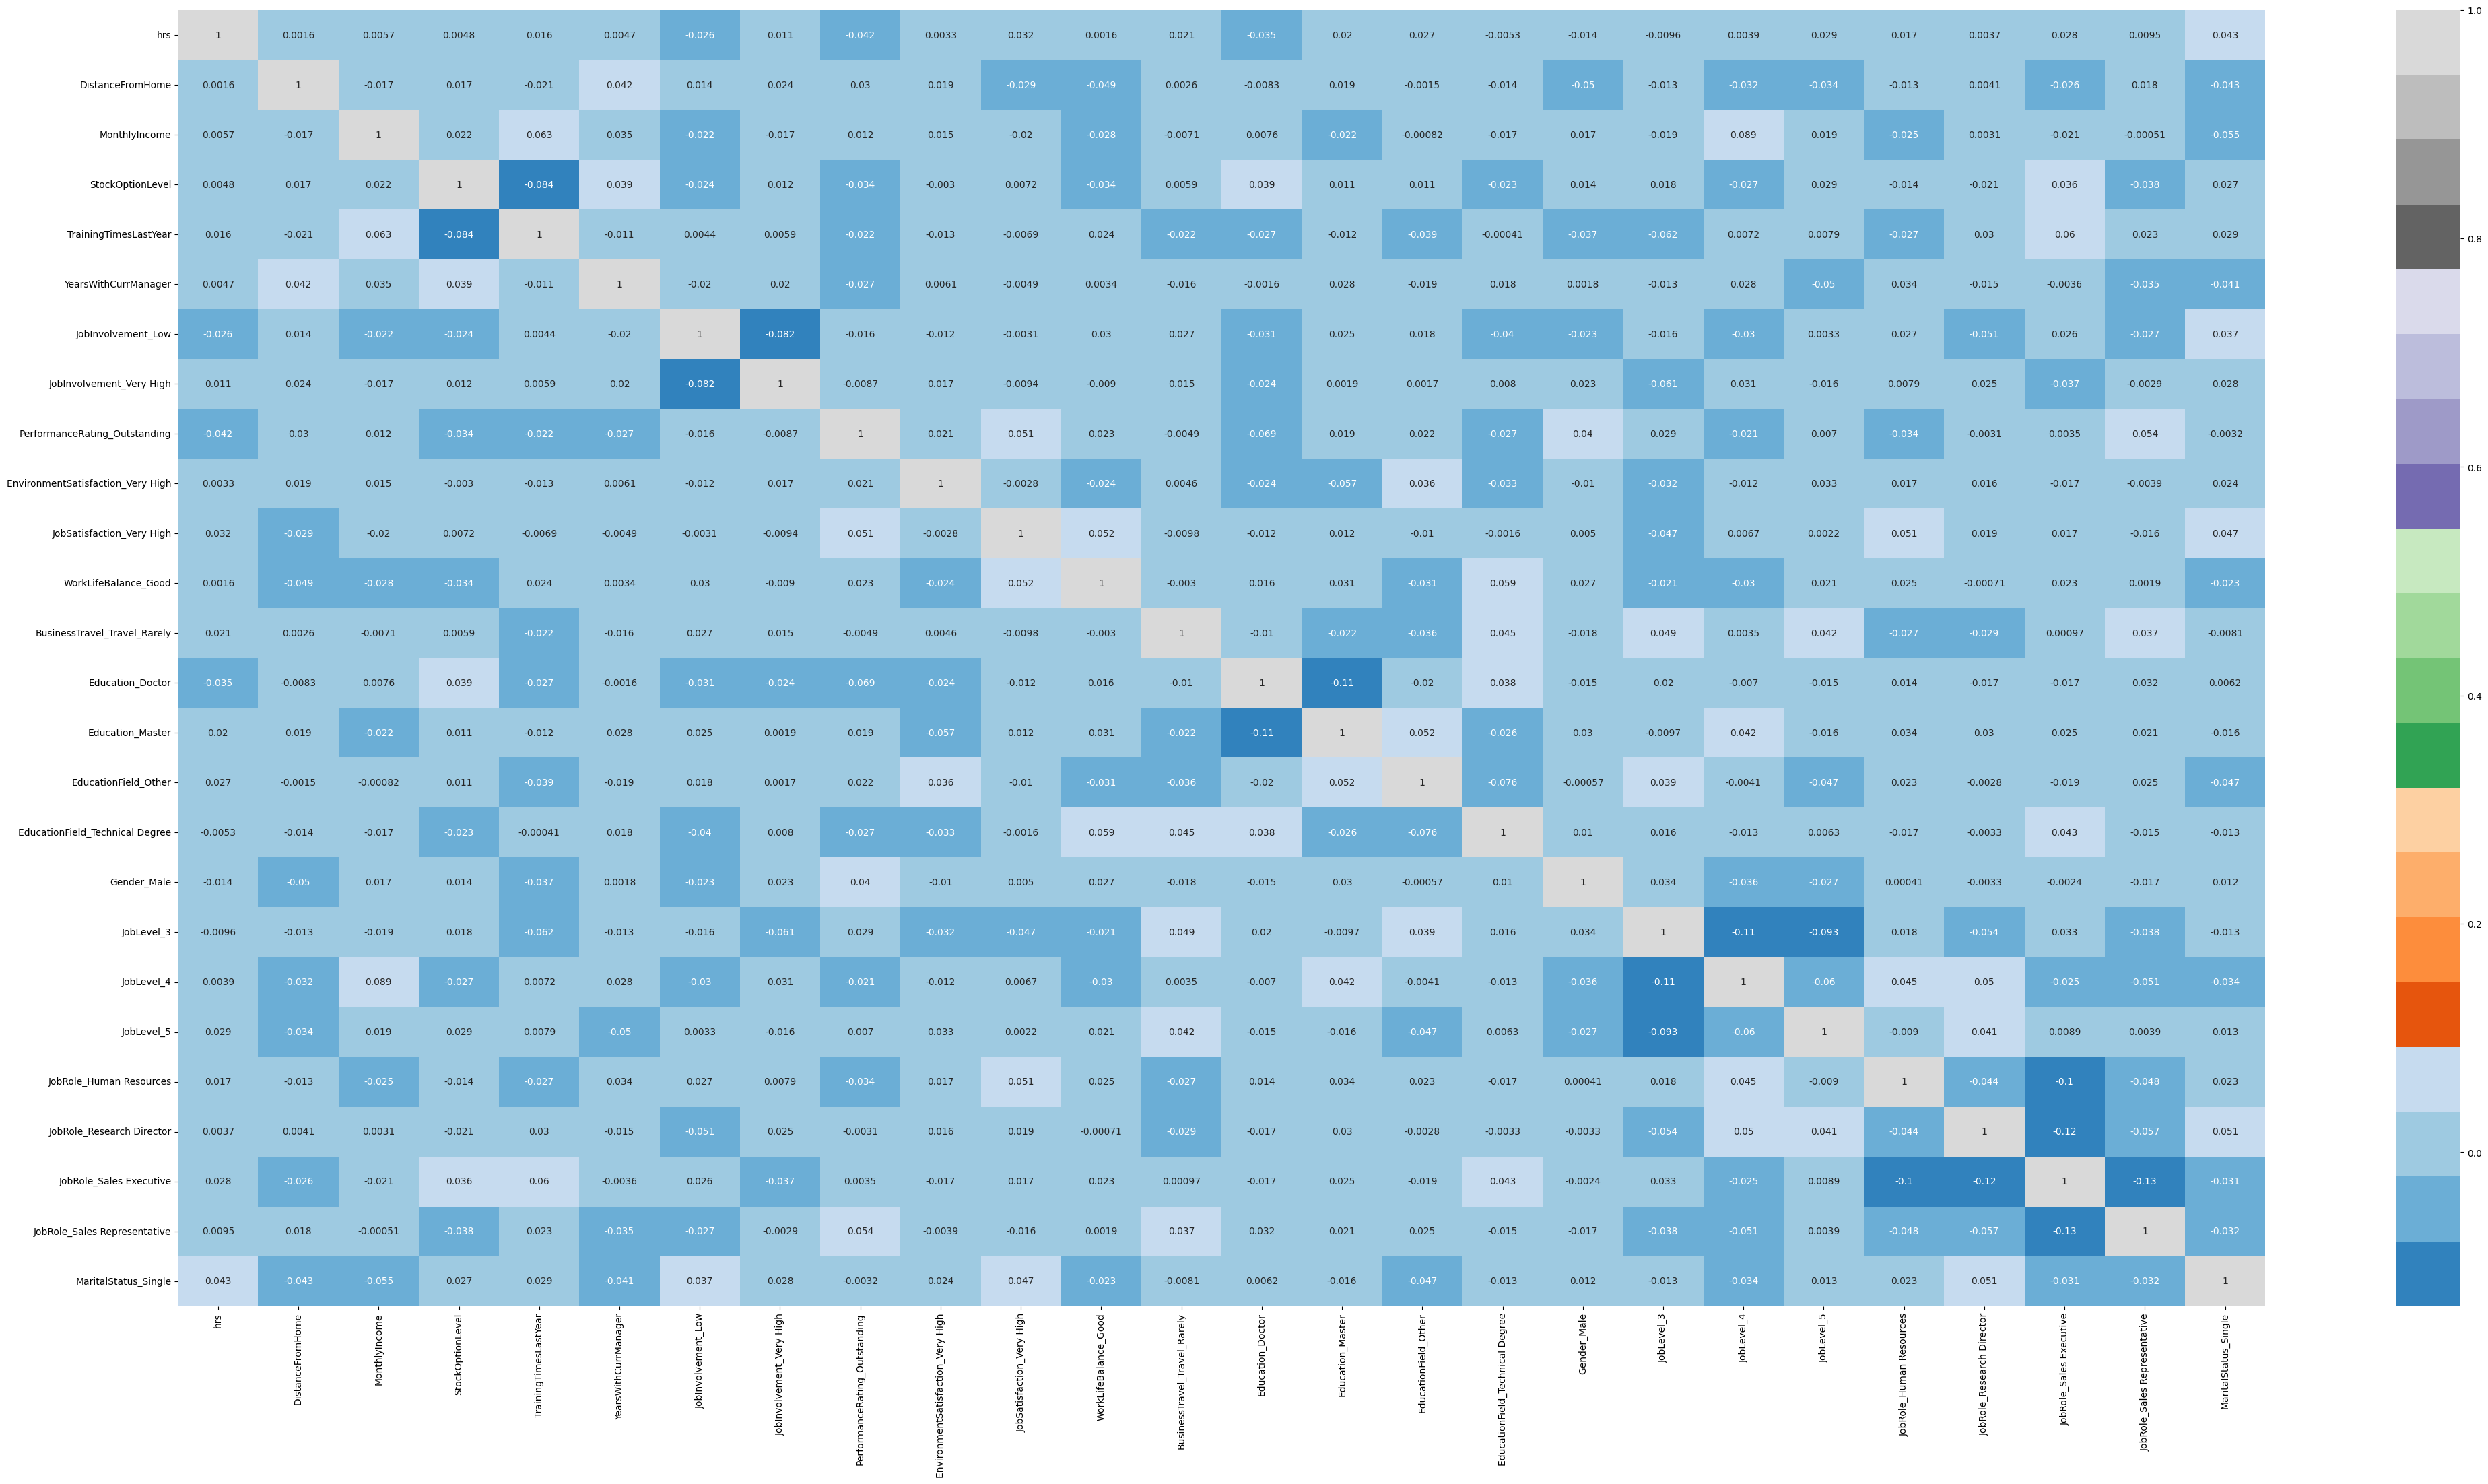

In [74]:
plt.figure(figsize = (50,25))
sns.heatmap(X_train.corr(),annot = True,cmap="tab20c")
plt.show()

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()

In [76]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 1, 0, ..., 1, 0, 0])

In [78]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  1.0


In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

Features   VIF
1      DistanceFromHome  1.02
3      StockOptionLevel  1.02
2         MonthlyIncome  1.02
5  YearsWithCurrManager  1.01
0                   hrs  1.01

In [80]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

[]


In [81]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

hrs  DistanceFromHome  MonthlyIncome  StockOptionLevel  \
537   2.429327         -0.282194       0.141772         -0.935020   
1881 -0.175435          0.088223       0.046708         -0.935020   
2367 -0.179239         -0.899556       0.167505         -0.935020   
3618  0.365562          1.199474      -0.594493          0.237936   
1398 -1.145968          0.211695       0.112423          1.410893   

      TrainingTimesLastYear  YearsWithCurrManager  JobInvolvement_Low  \
537                2.498059             -1.157795                   0   
1881               0.154895             -0.597068                   0   
2367               1.717004              0.804751                   0   
3618              -0.626160             -1.157795                   0   
1398              -0.626160              1.365479                   0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
537                          0                              1   
1881                         0                              0   
2367                         0                              0   
3618                         0                              0   
1398                         0                              1   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Very High  \
537                                   1                          1   
1881                                  1                          0   
2367                                  0                          0   
3618                                  0                          0   
1398                                  1                          0   

      WorkLifeBalance_Good  BusinessTravel_Travel_Rarely  Education_Doctor  \
537                      0                             1                 0   
1881                     0                             1                 0   
2367                     0                             1                 0   
3618                     0                             0                 0   
1398                     0                             1                 0   

      Education_Master  EducationField_Other  EducationField_Technical Degree  \
537                  1                     0                                0   
1881                 1                     0                                0   
2367                 1                     0                                0   
3618                 0                     0                                0   
1398                 0                     0                                0   

      Gender_Male  JobLevel_3  JobLevel_4  JobLevel_5  \
537             1           0           1           0   
1881            0           0           1           0   
2367            1           0           0           0   
3618            1           1           0           0   
1398            0           0           0           0   

      JobRole_Human Resources  JobRole_Research Director  \
537                         0                          0   
1881                        1                          0   
2367                        0                          0   
3618                        0                          0   
1398                        0                          0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
537                         1                             0   
1881                        0                             0   
2367                        0                             0   
3618                        0                             0   
1398                        1                             0   

      MaritalStatus_Single  
537                      0  
1881                     0  
2367                     0  
3618                     1  
1398                     0

In [82]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

hrs  DistanceFromHome  MonthlyIncome  StockOptionLevel  \
4019  0.001523          2.434197       0.079884          0.237936   
1697  1.063991          1.569891      -0.908182          0.237936   
2481 -0.171973          0.829057       0.064998          0.237936   
1039  0.420040         -0.899556       0.021613          1.410893   
93   -0.327932         -0.899556      -0.155116         -0.935020   

      TrainingTimesLastYear  YearsWithCurrManager  JobInvolvement_Low  \
4019              -0.626160             -1.157795                   0   
1697               0.935950             -0.316704                   0   
2481              -0.626160              1.085115                   0   
1039               0.154895             -0.036340                   0   
93                -2.188269              0.804751                   0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
4019                         1                              0   
1697                         0                              0   
2481                         0                              0   
1039                         0                              0   
93                           0                              0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Very High  \
4019                                  0                          0   
1697                                  0                          0   
2481                                  0                          1   
1039                                  1                          0   
93                                    0                          0   

      WorkLifeBalance_Good  BusinessTravel_Travel_Rarely  Education_Doctor  \
4019                     0                             1                 0   
1697                     1                             1                 0   
2481                     0                             1                 0   
1039                     0                             1                 0   
93                       0                             1                 0   

      Education_Master  EducationField_Other  EducationField_Technical Degree  \
4019                 0                     0                                0   
1697                 1                     0                                0   
2481                 0                     0                                0   
1039                 0                     0                                1   
93                   0                     0                                0   

      Gender_Male  JobLevel_3  JobLevel_4  JobLevel_5  \
4019            1           0           0           0   
1697            1           0           0           0   
2481            0           0           0           0   
1039            0           1           0           0   
93              1           0           0           0   

      JobRole_Human Resources  JobRole_Research Director  \
4019                        0                          0   
1697                        0                          0   
2481                        0                          0   
1039                        0                          0   
93                          0                          0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
4019                        0                             0   
1697                        0                             1   
2481                        0                             0   
1039                        1                             0   
93                          0                             0   

      MaritalStatus_Single  
4019                     0  
1697                     0  
2481                     1  
1039                     0  
93                       0

In [83]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 1, 0, ..., 1, 0, 0])

In [85]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  1.0


In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12       BusinessTravel_Travel_Rarely  2.42
17                        Gender_Male  2.06
25               MaritalStatus_Single  1.42
10          JobSatisfaction_Very High  1.40
9   EnvironmentSatisfaction_Very High  1.37
14                   Education_Master  1.35
23            JobRole_Sales Executive  1.31
11               WorkLifeBalance_Good  1.29
8       PerformanceRating_Outstanding  1.20
18                         JobLevel_3  1.20
7            JobInvolvement_Very High  1.11
16    EducationField_Technical Degree  1.11
19                         JobLevel_4  1.10
24       JobRole_Sales Representative  1.10
6                  JobInvolvement_Low  1.08
22          JobRole_Research Director  1.08
21            JobRole_Human Resources  1.07
20                         JobLevel_5  1.07
15               EducationField_Other  1.07
13                   Education_Doctor  1.05
4               TrainingTimesLastYear  1.03
1                    DistanceFromHome  1.02
3                    StockOptionLevel  1.02
2                       MonthlyIncome  1.02
5                YearsWithCurrManager  1.01
0                                 hrs  1.01

In [87]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[2575    0]
 [   0  511]]


In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

1.0

In [90]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

1.0

In [91]:
# Calculate false postive rate - predicting Attrition when customer does not have Attrited
print(FP/ float(TN+FP))

0.0


In [92]:
# Positive predictive value 
print (TP / float(TP+FP))

1.0


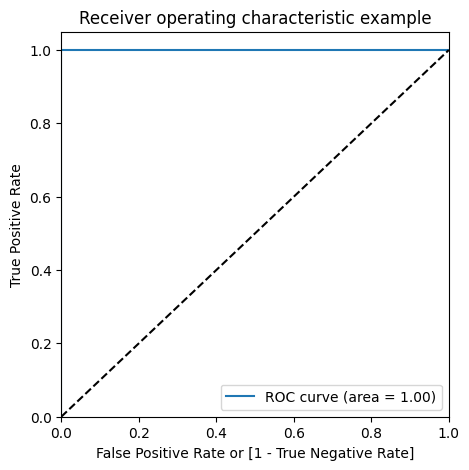

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train,predict_train)

In [94]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

1.0

In [95]:
recall_score(y_train,predict_train)

1.0

In [96]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [0 0 0 ... 0 1 0]


In [97]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[1093   30]
 [  24  176]]


In [98]:
# Let's check the overall accuracy.
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.9591836734693877

In [99]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

1.0

In [100]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

1.0

In [101]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :100.0 %
Train Data Sensitivity :100.0 %
Train Data Specificity :100.0 %
Test Data Accuracy     :95.92 %
Test Data Sensitivity  :100.0 %
Test Data Specificity  :100.0 %
